In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils
import torch.utils.data
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [2]:
# Define the exact solution u = H
def exact_solution_h(x, y, t):
    return -torch.sin(x)*torch.sin(y)*torch.cos(t)

def initial_condition_h(x, y):
    return -torch.sin(x)*torch.sin(y) 

In [3]:
# Define the exact solution p = E
def exact_solution_e1(x, y, t):
    return -torch.sin(x)*torch.sin(t)*torch.cos(y)

def initial_condition_e1(x, y):
    return 0.0*torch.sin(x) 

In [4]:
# Define the exact solution p = E
def exact_solution_e2(x, y, t):
    return torch.sin(y)*torch.sin(t)*torch.cos(x)

def initial_condition_e2(x, y):
    return 0.0*torch.sin(x) 

In [5]:
n_data = 500
n_var = 3
data_inp1 = torch.zeros((n_data, n_var))
data_inp1[:, 0] = pi/3
data_inp1[:, 1] = pi*torch.rand((n_data,1)).reshape(-1,)
data_inp1[:, 2] = torch.rand((n_data,1)).reshape(-1,)

data_inp2 = torch.zeros((n_data, n_var))
data_inp2[:, 0] = 2*pi/3
data_inp2[:, 1] = pi*torch.rand((n_data,1)).reshape(-1,)
data_inp2[:, 2] = torch.rand((n_data,1)).reshape(-1,)

data_inp3 = torch.zeros((n_data, n_var))
data_inp3[:, 0] = 0.6
data_inp3[:, 1] = torch.rand((n_data,1)).reshape(-1,)
data_inp3[:, 2] = torch.rand((n_data,1)).reshape(-1,)

data_inp4 = torch.zeros((n_data, n_var))
data_inp4[:, 0] = 0.8
data_inp4[:, 1] = torch.rand((n_data,1)).reshape(-1,)
data_inp4[:, 2] = torch.rand((n_data,1)).reshape(-1,)

data_inp5 = torch.zeros((n_data, n_var))
data_inp5[:, 0] = pi*torch.rand((n_data,1)).reshape(-1,)
data_inp5[:, 1] = pi/3
data_inp5[:, 2] = torch.rand((n_data,1)).reshape(-1,)

data_inp6 = torch.zeros((n_data, n_var))
data_inp6[:, 0] = pi*torch.rand((n_data,1)).reshape(-1,)
data_inp6[:, 1] = 2*pi/3
data_inp6[:, 2] = torch.rand((n_data,1)).reshape(-1,)

data_inp7 = torch.zeros((n_data, n_var))
data_inp7[:, 0] = torch.rand((n_data,1)).reshape(-1,)
data_inp7[:, 1] = 0.6
data_inp7[:, 2] = torch.rand((n_data,1)).reshape(-1,)

data_inp8 = torch.zeros((n_data, n_var))
data_inp8[:, 0] = torch.rand((n_data,1)).reshape(-1,)
data_inp8[:, 1] = 0.8
data_inp8[:, 2] = torch.rand((n_data,1)).reshape(-1,)

In [6]:
h_data1 = exact_solution_h(data_inp1[:, 0], data_inp1[:, 1], data_inp1[:, 2])
h_data1 = h_data1.reshape(-1,1)

h_data2 = exact_solution_h(data_inp2[:, 0], data_inp2[:, 1], data_inp2[:, 2])
h_data2 = h_data2.reshape(-1,1)

h_data3 = exact_solution_h(data_inp3[:, 0], data_inp3[:, 1], data_inp3[:, 2])
h_data3 = h_data3.reshape(-1,1)

h_data4 = exact_solution_h(data_inp4[:, 0], data_inp4[:, 1], data_inp4[:, 2])
h_data4 = h_data4.reshape(-1,1)

h_data5 = exact_solution_h(data_inp5[:, 0], data_inp5[:, 1], data_inp5[:, 2])
h_data5 = h_data5.reshape(-1,1)

h_data6 = exact_solution_h(data_inp6[:, 0], data_inp6[:, 1], data_inp6[:, 2])
h_data6 = h_data6.reshape(-1,1)

h_data7 = exact_solution_h(data_inp7[:, 0], data_inp7[:, 1], data_inp7[:, 2])
h_data7 = h_data7.reshape(-1,1)

h_data8 = exact_solution_h(data_inp8[:, 0], data_inp8[:, 1], data_inp8[:, 2])
h_data8 = h_data8.reshape(-1,1)

In [7]:
# assigning number of points
initial_pts = 200 
left_boundary_pts = 200 
right_boundary_pts = 200
back_boundary_pts = 200
front_boundary_pts = 200
residual_pts = 1000

In [8]:
# Type of optimizer (ADAM or LBFGS)
opt_type = "LBFGS"

x_init = pi*torch.rand((initial_pts,1)) # initial pts
y_init = pi*torch.rand((initial_pts,1))
t_init =  0*x_init
init =  torch.cat([x_init, y_init, t_init],1)
h_init = initial_condition_h(init[:,0], init[:, 1]).reshape(-1, 1)
e1_init = initial_condition_e1(init[:,0], init[:, 1]).reshape(-1, 1)
e2_init = initial_condition_e2(init[:,0], init[:, 1]).reshape(-1, 1)
w_init = torch.cat([h_init, e1_init, e2_init],1)


xb_left = torch.zeros((left_boundary_pts, 1)) # left spatial boundary
yb_left = pi*torch.rand((left_boundary_pts, 1)) # left spatial boundary
tb_left = torch.rand((left_boundary_pts, 1)) # 
b_left = torch.cat([xb_left, yb_left, tb_left ],1)
h_b_l = exact_solution_h(xb_left, yb_left, tb_left).reshape(-1, 1)
e1_b_l = exact_solution_e1(xb_left, yb_left, tb_left).reshape(-1, 1)
e2_b_l = exact_solution_e2(xb_left, yb_left, tb_left).reshape(-1, 1)



xb_right = pi*torch.ones((right_boundary_pts, 1)) # right spatial boundary
yb_right = pi*torch.rand((right_boundary_pts, 1)) # right spatial boundary
tb_right = torch.rand((right_boundary_pts, 1)) # right boundary pts
b_right = torch.cat([xb_right, yb_right, tb_right ],1)
h_b_r = exact_solution_h(xb_right, yb_right, tb_right).reshape(-1, 1)
e1_b_r = exact_solution_e1(xb_right, yb_right, tb_right).reshape(-1, 1)
e2_b_r = exact_solution_e2(xb_right, yb_right, tb_right).reshape(-1, 1)



xb_front = pi*torch.rand((front_boundary_pts, 1)) # front spatial boundary
yb_front = torch.zeros((front_boundary_pts, 1)) # front spatial boundary
tb_front = torch.rand((front_boundary_pts, 1)) # 
b_front = torch.cat([xb_front, yb_front, tb_front ],1)
h_b_f = exact_solution_h(xb_front, yb_front, tb_front).reshape(-1, 1)
e1_b_f = exact_solution_e1(xb_front, yb_front, tb_front).reshape(-1, 1)
e2_b_f = exact_solution_e2(xb_front, yb_front, tb_front).reshape(-1, 1)



xb_back = pi*torch.rand((back_boundary_pts, 1)) # back spatial boundary
yb_back = pi*torch.ones((back_boundary_pts, 1)) # back spatial boundary
tb_back = torch.rand((back_boundary_pts, 1)) # back boundary pts
b_back = torch.cat([xb_back, yb_back, tb_back ],1)
h_b_b = exact_solution_h(xb_back, yb_back, tb_back).reshape(-1, 1)
e1_b_b = exact_solution_e1(xb_back, yb_back, tb_back).reshape(-1, 1)
e2_b_b = exact_solution_e2(xb_back, yb_back, tb_back).reshape(-1, 1)



x_interior = pi*torch.rand((residual_pts, 1))
y_interior = pi*torch.rand((residual_pts, 1))
t_interior = torch.rand((residual_pts, 1))
interior = torch.cat([x_interior, y_interior, t_interior],1)





training_set = DataLoader(torch.utils.data.TensorDataset(init, w_init, b_left,  b_right, b_front, b_back), batch_size=200, shuffle=False)

In [9]:
class NeuralNet(nn.Module):

    def __init__(self, input_dimension, output_dimension, n_hidden_layers, neurons):
        super(NeuralNet, self).__init__()
        # Number of input dimensions n
        self.input_dimension = input_dimension
        # Number of output dimensions m
        self.output_dimension = output_dimension
        # Number of neurons per layer 
        self.neurons = neurons
        # Number of hidden layers 
        self.n_hidden_layers = n_hidden_layers
        # Activation function 
        self.activation = nn.Tanh()
        
        self.input_layer = nn.Linear(self.input_dimension, self.neurons)
        self.hidden_layers = nn.ModuleList([nn.Linear(self.neurons, self.neurons) for _ in range(n_hidden_layers)])
        self.output_layer = nn.Linear(self.neurons, self.output_dimension)

    def forward(self, x):
        # The forward function performs the set of affine and non-linear transformations defining the network 
        # (see equation above)
        x = self.activation(self.input_layer(x))
        for k, l in enumerate(self.hidden_layers):
            x = self.activation(l(x))
        return self.output_layer(x)


In [10]:
# Model definition
my_network = NeuralNet(input_dimension = init.shape[1], output_dimension = w_init.shape[1]+2, n_hidden_layers=4, neurons=20)


In [11]:
def init_xavier(model, retrain_seed):
    torch.manual_seed(retrain_seed)
    def init_weights(m):
        if type(m) == nn.Linear and m.weight.requires_grad and m.bias.requires_grad:
            g = nn.init.calculate_gain('tanh')
            torch.nn.init.xavier_uniform_(m.weight, gain=g)
            #torch.nn.init.xavier_normal_(m.weight, gain=g)
            m.bias.data.fill_(0)
    model.apply(init_weights)

# Random Seed for weight initialization
retrain = 128
# Xavier weight initialization
init_xavier(my_network, retrain)
#print(my_network(init))

In [12]:
if opt_type == "ADAM":
    optimizer_ = optim.Adam(my_network.parameters(), lr=0.001)
elif opt_type == "LBFGS":
    optimizer_ = optim.LBFGS(my_network.parameters(), lr=0.1, max_iter=1, max_eval=50000, tolerance_change=1.0 * np.finfo(float).eps)
else:
    raise ValueError("Optimizer not recognized")

In [13]:
def fit(model, training_set, interior, num_epochs, optimizer, p, verbose=True):
    history = list()
    
    # Loop over epochs
    for epoch in range(num_epochs):
        if verbose: print("################################ ", epoch, " ################################")

        running_loss = list([0])
        
        # Loop over batches
        for j, (initial, w_initial, bd_left,  bd_right, bd_front, bd_back) in enumerate(training_set):
            
            def closure():
                # zero the parameter gradients
                optimizer.zero_grad()
                # for initial
                initial.requires_grad = True
                w_initial_pred_ = model(initial)
                h_initial_pred_ = w_initial_pred_[:,0].reshape(-1,1)
                e1_initial_pred_ = w_initial_pred_[:,1].reshape(-1,1)
                e2_initial_pred_ = w_initial_pred_[:,2].reshape(-1,1)
                
                
                # with derivative
                inpu = torch.ones(initial_pts, 1 )
                
                grad_h_ini = torch.autograd.grad(h_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                h_initial_t = grad_h_ini[:, 2]
                
                grad_e1_ini = torch.autograd.grad(e1_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                e1_initial_t = grad_e1_ini[:, 2]
                
                grad_e2_ini = torch.autograd.grad(e2_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                e2_initial_t = grad_e2_ini[:, 2]
                
                
                
                # for left boundary
                w_bd_left_pred_ = model(bd_left)
                h_bd_left_pred_ = w_bd_left_pred_[:,0].reshape(-1,1)
                e1_bd_left_pred_ = w_bd_left_pred_[:,1].reshape(-1,1)
                e2_bd_left_pred_ = w_bd_left_pred_[:,2].reshape(-1,1)
                
                # for right boundary
                w_bd_right_pred_ = model(bd_right)
                h_bd_right_pred_ = w_bd_right_pred_[:,0].reshape(-1,1)
                e1_bd_right_pred_ = w_bd_right_pred_[:,1].reshape(-1,1)
                e2_bd_right_pred_ = w_bd_right_pred_[:,2].reshape(-1,1)
                
                # for front boundary
                w_bd_front_pred_ = model(bd_front)
                h_bd_front_pred_ = w_bd_front_pred_[:,0].reshape(-1,1)
                e1_bd_front_pred_ = w_bd_front_pred_[:,1].reshape(-1,1)
                e2_bd_front_pred_ = w_bd_front_pred_[:,2].reshape(-1,1)
                
                # for back boundary
                w_bd_back_pred_ = model(bd_back)
                h_bd_back_pred_ = w_bd_back_pred_[:,0].reshape(-1,1)
                e1_bd_back_pred_ = w_bd_back_pred_[:,1].reshape(-1,1)
                e2_bd_back_pred_ = w_bd_back_pred_[:,2].reshape(-1,1)
                
                # residual calculation
                interior.requires_grad = True
                w_hat = model(interior)
                h_hat = w_hat[:,0].reshape(-1,1)
                e1_hat = w_hat[:,1].reshape(-1,1)
                e2_hat = w_hat[:,2].reshape(-1,1)
                func1 = w_hat[:, 3].reshape(-1,1)
                func2 = w_hat[:, 4].reshape(-1,1)
                
                inputs = torch.ones(residual_pts, 1 )
                inputs2 = torch.ones(residual_pts, 1)
                
                grad_h_hat = torch.autograd.grad(h_hat.reshape(-1,1), interior, grad_outputs=inputs, create_graph=True)[0]
                h_x = grad_h_hat[:, 0].reshape(-1,1)
                h_y = grad_h_hat[:, 1].reshape(-1,1)
                
                grad_e1_hat = torch.autograd.grad(e1_hat, interior, grad_outputs=inputs, create_graph=True)[0]
                e1_x = grad_e1_hat[:, 0].reshape(-1,1)
                e1_y = grad_e1_hat[:, 1].reshape(-1,1)
                
                grad_e2_hat = torch.autograd.grad(e2_hat, interior, grad_outputs=inputs, create_graph=True)[0]
                e2_x = grad_e2_hat[:, 0].reshape(-1,1)
                e2_y = grad_e2_hat[:, 1].reshape(-1,1)
                
                h_t = grad_h_hat[:, 2].reshape(-1,1)
                e1_t = grad_e1_hat[:, 2].reshape(-1,1)
                e2_t = grad_e2_hat[:, 2].reshape(-1,1)
                
                output_data_pred1_ = model(data_inp1)
                h_data_pred1_ = output_data_pred1_[:, 0]
                
                output_data_pred2_ = model(data_inp2)
                h_data_pred2_ = output_data_pred2_[:, 0]
                
                output_data_pred3_ = model(data_inp3)
                h_data_pred3_ = output_data_pred3_[:, 0]
                
                output_data_pred4_ = model(data_inp4)
                h_data_pred4_ = output_data_pred4_[:, 0]
                
                output_data_pred5_ = model(data_inp5)
                h_data_pred5_ = output_data_pred5_[:, 0]
                
                output_data_pred6_ = model(data_inp6)
                h_data_pred6_ = output_data_pred6_[:, 0]
                
                output_data_pred7_ = model(data_inp7)
                h_data_pred7_ = output_data_pred7_[:, 0]
                
                output_data_pred8_ = model(data_inp8)
                h_data_pred8_ = output_data_pred8_[:, 0]
                
                
                # Item 1. below
                loss1 = torch.mean((h_initial_pred_.reshape(-1, ) - w_initial[:,0].reshape(-1, ))**p) + 0.1*torch.mean((2*h_t.reshape(-1, ) + e2_x.reshape(-1, ) - e1_y.reshape(-1, ))**p)+torch.mean((h_bd_left_pred_.reshape(-1,)- h_b_l.reshape(-1,))**p) + torch.mean((h_bd_right_pred_.reshape(-1,)- h_b_r.reshape(-1,))**p) +torch.mean((h_bd_front_pred_.reshape(-1,)- h_b_f.reshape(-1,))**p) + torch.mean((h_bd_back_pred_.reshape(-1,)- h_b_b.reshape(-1,))**p)
                loss2 = torch.mean((e1_initial_pred_.reshape(-1, ) - w_initial[:,1].reshape(-1, ))**p)+ 0.1*torch.mean((4*e1_t.reshape(-1, ) + func1.reshape(-1, ) - h_y.reshape(-1, ) + 3*torch.sin(interior[:, 0])*torch.cos(interior[:, 2])*torch.cos(interior[:, 1]) - 2*torch.cos(interior[:, 0])*torch.cos(interior[:, 2])*torch.sin(interior[:, 1]) )**p) +torch.mean((e1_bd_left_pred_.reshape(-1,)- e1_b_l.reshape(-1,))**p) + torch.mean((e1_bd_right_pred_.reshape(-1,)- e1_b_r.reshape(-1,))**p) +torch.mean((e1_bd_front_pred_.reshape(-1,)- e1_b_f.reshape(-1,))**p) + torch.mean((e1_bd_back_pred_.reshape(-1,)- e1_b_b.reshape(-1,))**p)
                loss3 = torch.mean((e2_initial_pred_.reshape(-1, ) - w_initial[:,2].reshape(-1, ))**p)+ 0.1*torch.mean((func2.reshape(-1, ) + e2_t.reshape(-1, )  + h_x.reshape(-1, ) + 2*torch.sin(interior[:, 0])*torch.cos(interior[:, 2])*torch.cos(interior[:, 1]))**p) +torch.mean((e2_bd_left_pred_.reshape(-1,)- e2_b_l.reshape(-1,))**p) + torch.mean((e2_bd_right_pred_.reshape(-1,)- e2_b_r.reshape(-1,))**p) +torch.mean((e2_bd_front_pred_.reshape(-1,)- e2_b_f.reshape(-1,))**p) + torch.mean((e2_bd_back_pred_.reshape(-1,)- e2_b_b.reshape(-1,))**p)
                data = torch.mean((h_data_pred1_.reshape(-1, ) - h_data1.reshape(-1, ))**p) + torch.mean((h_data_pred2_.reshape(-1, ) - h_data2.reshape(-1, ))**p)  + torch.mean((h_data_pred5_.reshape(-1, ) - h_data5.reshape(-1, ))**p) + torch.mean((h_data_pred6_.reshape(-1, ) - h_data6.reshape(-1, ))**p) 
                loss = loss1 + loss2 + loss3 + 0.1*data
                
                # Item 2. below
                loss.backward()
                # Compute average training loss over batches for the current epoch
                running_loss[0] += loss.item()
                return loss
            
            # Item 3. below
            optimizer.step(closure=closure)
            
        print('Loss: ', (running_loss[0] / len(training_set)))
        history.append(running_loss[0])

    return history


In [14]:
n_epochs = 10000
history = fit(my_network, training_set, interior, n_epochs, optimizer_, p=2, verbose=True )

################################  0  ################################
Loss:  24.84075355529785
################################  1  ################################
Loss:  24.459537506103516
################################  2  ################################
Loss:  18.74396514892578
################################  3  ################################
Loss:  12.311168670654297
################################  4  ################################
Loss:  8.868389129638672
################################  5  ################################
Loss:  7.080825328826904
################################  6  ################################
Loss:  6.19177770614624
################################  7  ################################
Loss:  5.56318473815918
################################  8  ################################
Loss:  5.017739295959473
################################  9  ################################
Loss:  4.521376132965088
################################  10  ############

Loss:  0.1580401062965393
################################  89  ################################
Loss:  0.1555434912443161
################################  90  ################################
Loss:  0.1531362682580948
################################  91  ################################
Loss:  0.1508530229330063
################################  92  ################################
Loss:  0.14857788383960724
################################  93  ################################
Loss:  0.14615020155906677
################################  94  ################################
Loss:  0.14372064173221588
################################  95  ################################
Loss:  0.14137935638427734
################################  96  ################################
Loss:  0.1391168236732483
################################  97  ################################
Loss:  0.13703730702400208
################################  98  ################################
Loss:  0.1348971128463745

Loss:  0.05092747509479523
################################  175  ################################
Loss:  0.05042969435453415
################################  176  ################################
Loss:  0.049937598407268524
################################  177  ################################
Loss:  0.04948318377137184
################################  178  ################################
Loss:  0.049046989530324936
################################  179  ################################
Loss:  0.04861566424369812
################################  180  ################################
Loss:  0.04817577078938484
################################  181  ################################
Loss:  0.04772549867630005
################################  182  ################################
Loss:  0.047237589955329895
################################  183  ################################
Loss:  0.04677867889404297
################################  184  ################################
Loss:  

Loss:  0.02592443861067295
################################  264  ################################
Loss:  0.025762410834431648
################################  265  ################################
Loss:  0.025601625442504883
################################  266  ################################
Loss:  0.025438716635107994
################################  267  ################################
Loss:  0.025280535221099854
################################  268  ################################
Loss:  0.02512156218290329
################################  269  ################################
Loss:  0.02497255988419056
################################  270  ################################
Loss:  0.02482476644217968
################################  271  ################################
Loss:  0.024682072922587395
################################  272  ################################
Loss:  0.0245384369045496
################################  273  ################################
Loss: 

Loss:  0.014388143084943295
################################  351  ################################
Loss:  0.014303671196103096
################################  352  ################################
Loss:  0.01422235555946827
################################  353  ################################
Loss:  0.014143818989396095
################################  354  ################################
Loss:  0.014065897092223167
################################  355  ################################
Loss:  0.013989237137138844
################################  356  ################################
Loss:  0.013914264738559723
################################  357  ################################
Loss:  0.013840783387422562
################################  358  ################################
Loss:  0.013766868971288204
################################  359  ################################
Loss:  0.013689575716853142
################################  360  ################################
L

Loss:  0.009220573119819164
################################  442  ################################
Loss:  0.009166520088911057
################################  443  ################################
Loss:  0.00911664217710495
################################  444  ################################
Loss:  0.009067576378583908
################################  445  ################################
Loss:  0.00901922769844532
################################  446  ################################
Loss:  0.008970758877694607
################################  447  ################################
Loss:  0.008924858644604683
################################  448  ################################
Loss:  0.008882804773747921
################################  449  ################################
Loss:  0.008840380236506462
################################  450  ################################
Loss:  0.008798139169812202
################################  451  ################################
Lo

Loss:  0.006522377487272024
################################  527  ################################
Loss:  0.006500863470137119
################################  528  ################################
Loss:  0.006479739211499691
################################  529  ################################
Loss:  0.006459951400756836
################################  530  ################################
Loss:  0.00643967604264617
################################  531  ################################
Loss:  0.0064196474850177765
################################  532  ################################
Loss:  0.0063993255607783794
################################  533  ################################
Loss:  0.0063784183003008366
################################  534  ################################
Loss:  0.006357609760016203
################################  535  ################################
Loss:  0.0063360705971717834
################################  536  ##############################

Loss:  0.0051636286079883575
################################  615  ################################
Loss:  0.005152864847332239
################################  616  ################################
Loss:  0.005141948815435171
################################  617  ################################
Loss:  0.005130990874022245
################################  618  ################################
Loss:  0.005119994282722473
################################  619  ################################
Loss:  0.005109013989567757
################################  620  ################################
Loss:  0.0050981612876057625
################################  621  ################################
Loss:  0.0050872499123215675
################################  622  ################################
Loss:  0.005076183006167412
################################  623  ################################
Loss:  0.005065029952675104
################################  624  ##############################

Loss:  0.004207460675388575
################################  702  ################################
Loss:  0.00419838959351182
################################  703  ################################
Loss:  0.004188196733593941
################################  704  ################################
Loss:  0.00417801458388567
################################  705  ################################
Loss:  0.004166894126683474
################################  706  ################################
Loss:  0.004157562740147114
################################  707  ################################
Loss:  0.004148459993302822
################################  708  ################################
Loss:  0.004138305317610502
################################  709  ################################
Loss:  0.004129144828766584
################################  710  ################################
Loss:  0.00411978317424655
################################  711  ################################
Los

Loss:  0.00340747251175344
################################  790  ################################
Loss:  0.003391292877495289
################################  791  ################################
Loss:  0.0033747106790542603
################################  792  ################################
Loss:  0.003357942681759596
################################  793  ################################
Loss:  0.0033398333471268415
################################  794  ################################
Loss:  0.0033241668716073036
################################  795  ################################
Loss:  0.0033096810802817345
################################  796  ################################
Loss:  0.0032956842333078384
################################  797  ################################
Loss:  0.003282005898654461
################################  798  ################################
Loss:  0.0032678868155926466
################################  799  ############################

Loss:  0.0026478844229131937
################################  878  ################################
Loss:  0.002642079023644328
################################  879  ################################
Loss:  0.0026363572105765343
################################  880  ################################
Loss:  0.0026313671842217445
################################  881  ################################
Loss:  0.002626656321808696
################################  882  ################################
Loss:  0.002621855353936553
################################  883  ################################
Loss:  0.0026172453071922064
################################  884  ################################
Loss:  0.0026126494631171227
################################  885  ################################
Loss:  0.0026085609570145607
################################  886  ################################
Loss:  0.0026049530133605003
################################  887  ##########################

Loss:  0.0022289517801254988
################################  965  ################################
Loss:  0.002226518699899316
################################  966  ################################
Loss:  0.002223276998847723
################################  967  ################################
Loss:  0.002219954039901495
################################  968  ################################
Loss:  0.002215697430074215
################################  969  ################################
Loss:  0.0022122364025563
################################  970  ################################
Loss:  0.0022080005146563053
################################  971  ################################
Loss:  0.002202587202191353
################################  972  ################################
Loss:  0.002197227207943797
################################  973  ################################
Loss:  0.0021910658106207848
################################  974  ################################

Loss:  0.001862941076979041
################################  1050  ################################
Loss:  0.0018600529292598367
################################  1051  ################################
Loss:  0.0018572502303868532
################################  1052  ################################
Loss:  0.001854032278060913
################################  1053  ################################
Loss:  0.0018502603052183986
################################  1054  ################################
Loss:  0.0018463936867192388
################################  1055  ################################
Loss:  0.0018422706052660942
################################  1056  ################################
Loss:  0.0018382139969617128
################################  1057  ################################
Loss:  0.001833941787481308
################################  1058  ################################
Loss:  0.0018296727212145925
################################  1059  ################

Loss:  0.0016190536553040147
################################  1131  ################################
Loss:  0.0016156742349267006
################################  1132  ################################
Loss:  0.0016126011032611132
################################  1133  ################################
Loss:  0.0016095639439299703
################################  1134  ################################
Loss:  0.0016065567033365369
################################  1135  ################################
Loss:  0.001603637938387692
################################  1136  ################################
Loss:  0.0016006985679268837
################################  1137  ################################
Loss:  0.001597933704033494
################################  1138  ################################
Loss:  0.0015951698878780007
################################  1139  ################################
Loss:  0.0015928280772641301
################################  1140  ###############

Loss:  0.001362654147669673
################################  1220  ################################
Loss:  0.0013611488975584507
################################  1221  ################################
Loss:  0.0013597521465271711
################################  1222  ################################
Loss:  0.0013584576081484556
################################  1223  ################################
Loss:  0.0013572751777246594
################################  1224  ################################
Loss:  0.0013561890227720141
################################  1225  ################################
Loss:  0.0013551508309319615
################################  1226  ################################
Loss:  0.0013541573425754905
################################  1227  ################################
Loss:  0.001353166881017387
################################  1228  ################################
Loss:  0.0013521865475922823
################################  1229  ###############

Loss:  0.0012159997131675482
################################  1307  ################################
Loss:  0.001214951160363853
################################  1308  ################################
Loss:  0.0012138420715928078
################################  1309  ################################
Loss:  0.0012126917717978358
################################  1310  ################################
Loss:  0.0012114892015233636
################################  1311  ################################
Loss:  0.001210243790410459
################################  1312  ################################
Loss:  0.0012089218944311142
################################  1313  ################################
Loss:  0.0012076167622581124
################################  1314  ################################
Loss:  0.0012061960296705365
################################  1315  ################################
Loss:  0.0012048407224938273
################################  1316  ###############

Loss:  0.0010696210665628314
################################  1396  ################################
Loss:  0.0010678119724616408
################################  1397  ################################
Loss:  0.0010659953113645315
################################  1398  ################################
Loss:  0.0010644644498825073
################################  1399  ################################
Loss:  0.0010629893513396382
################################  1400  ################################
Loss:  0.001061484101228416
################################  1401  ################################
Loss:  0.0010599441593512893
################################  1402  ################################
Loss:  0.0010584410047158599
################################  1403  ################################
Loss:  0.0010569531004875898
################################  1404  ################################
Loss:  0.001055513508617878
################################  1405  ###############

Loss:  0.0009703813120722771
################################  1477  ################################
Loss:  0.0009695304906927049
################################  1478  ################################
Loss:  0.0009686053963378072
################################  1479  ################################
Loss:  0.0009676966583356261
################################  1480  ################################
Loss:  0.0009667552076280117
################################  1481  ################################
Loss:  0.0009658517083153129
################################  1482  ################################
Loss:  0.0009649054845795035
################################  1483  ################################
Loss:  0.0009639401687309146
################################  1484  ################################
Loss:  0.0009629197884351015
################################  1485  ################################
Loss:  0.0009619754273444414
################################  1486  #############

Loss:  0.0008796759066171944
################################  1565  ################################
Loss:  0.0008788923732936382
################################  1566  ################################
Loss:  0.0008780784555710852
################################  1567  ################################
Loss:  0.0008773048175498843
################################  1568  ################################
Loss:  0.000876500504091382
################################  1569  ################################
Loss:  0.0008757938630878925
################################  1570  ################################
Loss:  0.0008750180713832378
################################  1571  ################################
Loss:  0.0008742735371924937
################################  1572  ################################
Loss:  0.0008734434959478676
################################  1573  ################################
Loss:  0.0008725104853510857
################################  1574  ##############

Loss:  0.0008054019417613745
################################  1649  ################################
Loss:  0.0008046072325669229
################################  1650  ################################
Loss:  0.0008038305677473545
################################  1651  ################################
Loss:  0.0008030319586396217
################################  1652  ################################
Loss:  0.0008022352121770382
################################  1653  ################################
Loss:  0.0008014296763576567
################################  1654  ################################
Loss:  0.0008006278076209128
################################  1655  ################################
Loss:  0.0007998329820111394
################################  1656  ################################
Loss:  0.0007990514859557152
################################  1657  ################################
Loss:  0.0007982809911482036
################################  1658  #############

Loss:  0.0007433034479618073
################################  1730  ################################
Loss:  0.0007425323710776865
################################  1731  ################################
Loss:  0.0007418593158945441
################################  1732  ################################
Loss:  0.0007411731639876962
################################  1733  ################################
Loss:  0.000740568561013788
################################  1734  ################################
Loss:  0.0007399233873002231
################################  1735  ################################
Loss:  0.0007393235573545098
################################  1736  ################################
Loss:  0.000738654809538275
################################  1737  ################################
Loss:  0.0007378893787972629
################################  1738  ################################
Loss:  0.0007371048559434712
################################  1739  ###############

Loss:  0.0006958997109904885
################################  1815  ################################
Loss:  0.0006950923125259578
################################  1816  ################################
Loss:  0.0006942095351405442
################################  1817  ################################
Loss:  0.0006931980024091899
################################  1818  ################################
Loss:  0.0006922931061126292
################################  1819  ################################
Loss:  0.0006913347751833498
################################  1820  ################################
Loss:  0.0006902468157932162
################################  1821  ################################
Loss:  0.0006891845259815454
################################  1822  ################################
Loss:  0.0006881470908410847
################################  1823  ################################
Loss:  0.0006871962687000632
################################  1824  #############

Loss:  0.0006414334638975561
################################  1903  ################################
Loss:  0.0006406873580999672
################################  1904  ################################
Loss:  0.0006398936966434121
################################  1905  ################################
Loss:  0.0006390907801687717
################################  1906  ################################
Loss:  0.0006382697029039264
################################  1907  ################################
Loss:  0.0006374248769134283
################################  1908  ################################
Loss:  0.0006364798173308372
################################  1909  ################################
Loss:  0.0006357778329402208
################################  1910  ################################
Loss:  0.0006349820178002119
################################  1911  ################################
Loss:  0.0006343571003526449
################################  1912  #############

Loss:  0.000579961109906435
################################  1992  ################################
Loss:  0.000579734449274838
################################  1993  ################################
Loss:  0.0005795038887299597
################################  1994  ################################
Loss:  0.0005792728625237942
################################  1995  ################################
Loss:  0.0005790187860839069
################################  1996  ################################
Loss:  0.0005787741974927485
################################  1997  ################################
Loss:  0.0005785170360468328
################################  1998  ################################
Loss:  0.0005781949148513377
################################  1999  ################################
Loss:  0.0005779286730103195
################################  2000  ################################
Loss:  0.0005776617326773703
################################  2001  ###############

Loss:  0.0005448342999443412
################################  2080  ################################
Loss:  0.0005444566486403346
################################  2081  ################################
Loss:  0.0005440854001790285
################################  2082  ################################
Loss:  0.0005437484360300004
################################  2083  ################################
Loss:  0.0005434136255644262
################################  2084  ################################
Loss:  0.0005431186873465776
################################  2085  ################################
Loss:  0.0005428312579169869
################################  2086  ################################
Loss:  0.0005425582057796419
################################  2087  ################################
Loss:  0.00054229173110798
################################  2088  ################################
Loss:  0.0005420200759544969
################################  2089  ###############

Loss:  0.0005173663957975805
################################  2166  ################################
Loss:  0.0005168979987502098
################################  2167  ################################
Loss:  0.0005164333852007985
################################  2168  ################################
Loss:  0.0005159753491170704
################################  2169  ################################
Loss:  0.0005155147518962622
################################  2170  ################################
Loss:  0.0005150705692358315
################################  2171  ################################
Loss:  0.000514654500875622
################################  2172  ################################
Loss:  0.0005142788868397474
################################  2173  ################################
Loss:  0.0005138969281688333
################################  2174  ################################
Loss:  0.0005135549581609666
################################  2175  ##############

Loss:  0.0004775039851665497
################################  2255  ################################
Loss:  0.0004770721716340631
################################  2256  ################################
Loss:  0.00047664844896644354
################################  2257  ################################
Loss:  0.0004762222233694047
################################  2258  ################################
Loss:  0.00047579267993569374
################################  2259  ################################
Loss:  0.0004753722751047462
################################  2260  ################################
Loss:  0.0004749488434754312
################################  2261  ################################
Loss:  0.00047454459127038717
################################  2262  ################################
Loss:  0.0004741601296700537
################################  2263  ################################
Loss:  0.00047375273425132036
################################  2264  #########

Loss:  0.00044382401392795146
################################  2336  ################################
Loss:  0.0004436167946550995
################################  2337  ################################
Loss:  0.0004433870781213045
################################  2338  ################################
Loss:  0.000443188997451216
################################  2339  ################################
Loss:  0.00044292162056080997
################################  2340  ################################
Loss:  0.0004427258390933275
################################  2341  ################################
Loss:  0.0004425037477631122
################################  2342  ################################
Loss:  0.0004422409401740879
################################  2343  ################################
Loss:  0.00044190711923874915
################################  2344  ################################
Loss:  0.00044164276914671063
################################  2345  ##########

Loss:  0.00042228915845043957
################################  2417  ################################
Loss:  0.0004219897964503616
################################  2418  ################################
Loss:  0.00042166837374679744
################################  2419  ################################
Loss:  0.00042140137520618737
################################  2420  ################################
Loss:  0.00042108335765078664
################################  2421  ################################
Loss:  0.000420763943111524
################################  2422  ################################
Loss:  0.0004204321885481477
################################  2423  ################################
Loss:  0.00042013899656012654
################################  2424  ################################
Loss:  0.0004198289243504405
################################  2425  ################################
Loss:  0.0004194890207145363
################################  2426  #########

Loss:  0.00039957286207936704
################################  2497  ################################
Loss:  0.0003992240526713431
################################  2498  ################################
Loss:  0.0003988926182501018
################################  2499  ################################
Loss:  0.00039855344220995903
################################  2500  ################################
Loss:  0.0003982024500146508
################################  2501  ################################
Loss:  0.0003977996821049601
################################  2502  ################################
Loss:  0.00039752322481945157
################################  2503  ################################
Loss:  0.00039724918315187097
################################  2504  ################################
Loss:  0.0003969425742980093
################################  2505  ################################
Loss:  0.0003966874210163951
################################  2506  #########

Loss:  0.0003768423630390316
################################  2583  ################################
Loss:  0.0003766661393456161
################################  2584  ################################
Loss:  0.00037646866985596716
################################  2585  ################################
Loss:  0.00037625167169608176
################################  2586  ################################
Loss:  0.0003761127300094813
################################  2587  ################################
Loss:  0.0003759141836781055
################################  2588  ################################
Loss:  0.0003757026279345155
################################  2589  ################################
Loss:  0.0003754866193048656
################################  2590  ################################
Loss:  0.00037525445804931223
################################  2591  ################################
Loss:  0.00037501624319702387
################################  2592  #########

Loss:  0.00036107952473685145
################################  2667  ################################
Loss:  0.0003608377301134169
################################  2668  ################################
Loss:  0.00036059448029845953
################################  2669  ################################
Loss:  0.00036037084646523
################################  2670  ################################
Loss:  0.00036015629302710295
################################  2671  ################################
Loss:  0.00035993795609101653
################################  2672  ################################
Loss:  0.00035972640034742653
################################  2673  ################################
Loss:  0.0003595094894990325
################################  2674  ################################
Loss:  0.0003593014844227582
################################  2675  ################################
Loss:  0.0003590821579564363
################################  2676  ##########

################################  2751  ################################
Loss:  0.0003431742952670902
################################  2752  ################################
Loss:  0.00034300953848287463
################################  2753  ################################
Loss:  0.0003428543859627098
################################  2754  ################################
Loss:  0.00034269882598891854
################################  2755  ################################
Loss:  0.00034255284117534757
################################  2756  ################################
Loss:  0.00034239699016325176
################################  2757  ################################
Loss:  0.00034225694253109396
################################  2758  ################################
Loss:  0.0003421016735956073
################################  2759  ################################
Loss:  0.0003419512649998069
################################  2760  ################################
Loss

Loss:  0.00032469857251271605
################################  2837  ################################
Loss:  0.0003245201660320163
################################  2838  ################################
Loss:  0.0003243453393224627
################################  2839  ################################
Loss:  0.000324185355566442
################################  2840  ################################
Loss:  0.00032402921351604164
################################  2841  ################################
Loss:  0.00032388410181738436
################################  2842  ################################
Loss:  0.0003237362252548337
################################  2843  ################################
Loss:  0.0003236073534935713
################################  2844  ################################
Loss:  0.0003234644827898592
################################  2845  ################################
Loss:  0.00032331523834727705
################################  2846  ##########

Loss:  0.00030185916693881154
################################  2924  ################################
Loss:  0.00030175672145560384
################################  2925  ################################
Loss:  0.00030165936914272606
################################  2926  ################################
Loss:  0.00030155415879562497
################################  2927  ################################
Loss:  0.00030145555501803756
################################  2928  ################################
Loss:  0.00030135628185234964
################################  2929  ################################
Loss:  0.00030126122874207795
################################  2930  ################################
Loss:  0.00030115817207843065
################################  2931  ################################
Loss:  0.0003010425134561956
################################  2932  ################################
Loss:  0.0003009177453350276
################################  2933  #####

Loss:  0.00028628684231080115
################################  3005  ################################
Loss:  0.0002861433895304799
################################  3006  ################################
Loss:  0.00028600372024811804
################################  3007  ################################
Loss:  0.00028586716507561505
################################  3008  ################################
Loss:  0.00028573154122568667
################################  3009  ################################
Loss:  0.00028559862403199077
################################  3010  ################################
Loss:  0.0002854664053302258
################################  3011  ################################
Loss:  0.0002853383484762162
################################  3012  ################################
Loss:  0.0002852158504538238
################################  3013  ################################
Loss:  0.00028509722324088216
################################  3014  #######

Loss:  0.0002729445113800466
################################  3090  ################################
Loss:  0.0002728279505390674
################################  3091  ################################
Loss:  0.0002727100800257176
################################  3092  ################################
Loss:  0.0002725817612372339
################################  3093  ################################
Loss:  0.00027245472301729023
################################  3094  ################################
Loss:  0.0002723241050262004
################################  3095  ################################
Loss:  0.00027219191542826593
################################  3096  ################################
Loss:  0.0002720602788031101
################################  3097  ################################
Loss:  0.0002719273616094142
################################  3098  ################################
Loss:  0.0002718009636737406
################################  3099  ###########

Loss:  0.0002612340322230011
################################  3171  ################################
Loss:  0.00026115120272152126
################################  3172  ################################
Loss:  0.00026106182485818863
################################  3173  ################################
Loss:  0.000260990607785061
################################  3174  ################################
Loss:  0.00026090783649124205
################################  3175  ################################
Loss:  0.000260827480815351
################################  3176  ################################
Loss:  0.0002607321075629443
################################  3177  ################################
Loss:  0.0002606265770737082
################################  3178  ################################
Loss:  0.0002605073677841574
################################  3179  ################################
Loss:  0.00026037878706119955
################################  3180  ###########

Loss:  0.0002509389887563884
################################  3260  ################################
Loss:  0.0002508569450583309
################################  3261  ################################
Loss:  0.00025078639737330377
################################  3262  ################################
Loss:  0.0002507166936993599
################################  3263  ################################
Loss:  0.0002506424207240343
################################  3264  ################################
Loss:  0.00025057513266801834
################################  3265  ################################
Loss:  0.00025050240219570696
################################  3266  ################################
Loss:  0.00025043939240276814
################################  3267  ################################
Loss:  0.00025037064915522933
################################  3268  ################################
Loss:  0.00025031223776750267
################################  3269  #######

Loss:  0.0002422992984065786
################################  3349  ################################
Loss:  0.0002422217803541571
################################  3350  ################################
Loss:  0.0002421461249468848
################################  3351  ################################
Loss:  0.0002420747623546049
################################  3352  ################################
Loss:  0.00024200369080062956
################################  3353  ################################
Loss:  0.0002419373777229339
################################  3354  ################################
Loss:  0.00024186886730603874
################################  3355  ################################
Loss:  0.00024180598848033696
################################  3356  ################################
Loss:  0.0002417456271359697
################################  3357  ################################
Loss:  0.00024168306845240295
################################  3358  #########

Loss:  0.00023158873955253512
################################  3436  ################################
Loss:  0.00023141520796343684
################################  3437  ################################
Loss:  0.0002312411816092208
################################  3438  ################################
Loss:  0.0002310890849912539
################################  3439  ################################
Loss:  0.00023093455820344388
################################  3440  ################################
Loss:  0.000230805337196216
################################  3441  ################################
Loss:  0.00023068636073730886
################################  3442  ################################
Loss:  0.0002305412053829059
################################  3443  ################################
Loss:  0.00023043928376864642
################################  3444  ################################
Loss:  0.00023035454796627164
################################  3445  ########

Loss:  0.00022271672787610441
################################  3517  ################################
Loss:  0.00022260284458752722
################################  3518  ################################
Loss:  0.00022248770983424038
################################  3519  ################################
Loss:  0.00022236889344640076
################################  3520  ################################
Loss:  0.00022226052533369511
################################  3521  ################################
Loss:  0.00022214860655367374
################################  3522  ################################
Loss:  0.00022204963897820562
################################  3523  ################################
Loss:  0.00022193288896232843
################################  3524  ################################
Loss:  0.00022183035616762936
################################  3525  ################################
Loss:  0.0002217242436017841
################################  3526  ####

Loss:  0.00021442437719088048
################################  3605  ################################
Loss:  0.00021432725770864636
################################  3606  ################################
Loss:  0.00021423125872388482
################################  3607  ################################
Loss:  0.00021414151706267148
################################  3608  ################################
Loss:  0.0002140460128430277
################################  3609  ################################
Loss:  0.00021396327065303922
################################  3610  ################################
Loss:  0.0002138628187822178
################################  3611  ################################
Loss:  0.00021379611280281097
################################  3612  ################################
Loss:  0.0002137306146323681
################################  3613  ################################
Loss:  0.00021365696738939732
################################  3614  ######

Loss:  0.0002063148422166705
################################  3686  ################################
Loss:  0.00020624401804525405
################################  3687  ################################
Loss:  0.00020617921836674213
################################  3688  ################################
Loss:  0.0002061111736111343
################################  3689  ################################
Loss:  0.00020604363817255944
################################  3690  ################################
Loss:  0.00020596898684743792
################################  3691  ################################
Loss:  0.000205897624255158
################################  3692  ################################
Loss:  0.0002058085083262995
################################  3693  ################################
Loss:  0.00020569762273225933
################################  3694  ################################
Loss:  0.0002055716613540426
################################  3695  #########

Loss:  0.00019753088417928666
################################  3773  ################################
Loss:  0.0001974460028577596
################################  3774  ################################
Loss:  0.00019735457317437977
################################  3775  ################################
Loss:  0.00019728603365365416
################################  3776  ################################
Loss:  0.00019720983982551843
################################  3777  ################################
Loss:  0.00019713360234163702
################################  3778  ################################
Loss:  0.00019705000158865005
################################  3779  ################################
Loss:  0.0001969557924894616
################################  3780  ################################
Loss:  0.00019685807637870312
################################  3781  ################################
Loss:  0.00019676396914292127
################################  3782  #####

Loss:  0.00019151192100252956
################################  3856  ################################
Loss:  0.00019144867837894708
################################  3857  ################################
Loss:  0.00019139240612275898
################################  3858  ################################
Loss:  0.00019134211470372975
################################  3859  ################################
Loss:  0.00019129208521917462
################################  3860  ################################
Loss:  0.00019124546088278294
################################  3861  ################################
Loss:  0.00019120417709928006
################################  3862  ################################
Loss:  0.00019116162729915231
################################  3863  ################################
Loss:  0.00019111749134026468
################################  3864  ################################
Loss:  0.00019107191474176943
################################  3865  ###

Loss:  0.00018641658243723214
################################  3940  ################################
Loss:  0.00018637346511241049
################################  3941  ################################
Loss:  0.00018633926811162382
################################  3942  ################################
Loss:  0.00018630186968948692
################################  3943  ################################
Loss:  0.00018625859229359776
################################  3944  ################################
Loss:  0.00018620159244164824
################################  3945  ################################
Loss:  0.00018615271255839616
################################  3946  ################################
Loss:  0.00018610208644531667
################################  3947  ################################
Loss:  0.00018604579963721335
################################  3948  ################################
Loss:  0.00018598460883367807
################################  3949  ###

Loss:  0.00018000857380684465
################################  4025  ################################
Loss:  0.00017991526692640036
################################  4026  ################################
Loss:  0.00017982526333071291
################################  4027  ################################
Loss:  0.00017970468616113067
################################  4028  ################################
Loss:  0.00017959681281354278
################################  4029  ################################
Loss:  0.000179466835106723
################################  4030  ################################
Loss:  0.0001792951370589435
################################  4031  ################################
Loss:  0.00017916056094691157
################################  4032  ################################
Loss:  0.0001790200622053817
################################  4033  ################################
Loss:  0.00017886805289890617
################################  4034  #######

Loss:  0.00017321013729088008
################################  4105  ################################
Loss:  0.00017317596939392388
################################  4106  ################################
Loss:  0.00017314203432761133
################################  4107  ################################
Loss:  0.0001731122174533084
################################  4108  ################################
Loss:  0.00017308078531641513
################################  4109  ################################
Loss:  0.00017304994980804622
################################  4110  ################################
Loss:  0.00017301626212429255
################################  4111  ################################
Loss:  0.00017298755119554698
################################  4112  ################################
Loss:  0.00017295799625571817
################################  4113  ################################
Loss:  0.0001729324576444924
################################  4114  #####

Loss:  0.00016765504551585764
################################  4191  ################################
Loss:  0.0001676098327152431
################################  4192  ################################
Loss:  0.00016756015247665346
################################  4193  ################################
Loss:  0.0001674937375355512
################################  4194  ################################
Loss:  0.00016742247680667788
################################  4195  ################################
Loss:  0.00016734719974920154
################################  4196  ################################
Loss:  0.0001672637154115364
################################  4197  ################################
Loss:  0.0001671853387961164
################################  4198  ################################
Loss:  0.0001670964265940711
################################  4199  ################################
Loss:  0.00016701946151442826
################################  4200  ########

Loss:  0.00016100250650197268
################################  4278  ################################
Loss:  0.000160895157023333
################################  4279  ################################
Loss:  0.00016080786008387804
################################  4280  ################################
Loss:  0.00016071043501142412
################################  4281  ################################
Loss:  0.00016063859220594168
################################  4282  ################################
Loss:  0.00016056629829108715
################################  4283  ################################
Loss:  0.00016049057012423873
################################  4284  ################################
Loss:  0.00016041715571191162
################################  4285  ################################
Loss:  0.00016035228327382356
################################  4286  ################################
Loss:  0.0001602876145625487
################################  4287  ######

Loss:  0.00015708128921687603
################################  4359  ################################
Loss:  0.00015704245015513152
################################  4360  ################################
Loss:  0.00015700585208833218
################################  4361  ################################
Loss:  0.000156965950736776
################################  4362  ################################
Loss:  0.00015692980377934873
################################  4363  ################################
Loss:  0.0001568914158269763
################################  4364  ################################
Loss:  0.00015685205289628357
################################  4365  ################################
Loss:  0.00015680793148931116
################################  4366  ################################
Loss:  0.0001567672734381631
################################  4367  ################################
Loss:  0.00015672686276957393
################################  4368  #######

Loss:  0.0001542011450510472
################################  4439  ################################
Loss:  0.00015417086251545697
################################  4440  ################################
Loss:  0.00015414254448842257
################################  4441  ################################
Loss:  0.00015411422646138817
################################  4442  ################################
Loss:  0.00015408264880534261
################################  4443  ################################
Loss:  0.00015404682199005038
################################  4444  ################################
Loss:  0.0001540111261419952
################################  4445  ################################
Loss:  0.00015397420793306082
################################  4446  ################################
Loss:  0.0001539309450890869
################################  4447  ################################
Loss:  0.0001538890937808901
################################  4448  #######

Loss:  0.00015086395433172584
################################  4521  ################################
Loss:  0.000150820633280091
################################  4522  ################################
Loss:  0.00015077335410751402
################################  4523  ################################
Loss:  0.00015073333634063601
################################  4524  ################################
Loss:  0.0001506914122728631
################################  4525  ################################
Loss:  0.00015063722094055265
################################  4526  ################################
Loss:  0.0001506017433712259
################################  4527  ################################
Loss:  0.00015055948460940272
################################  4528  ################################
Loss:  0.0001505156105849892
################################  4529  ################################
Loss:  0.00015046635235194117
################################  4530  ########

Loss:  0.00014731126429978758
################################  4602  ################################
Loss:  0.0001472874137107283
################################  4603  ################################
Loss:  0.0001472622388973832
################################  4604  ################################
Loss:  0.0001472396543249488
################################  4605  ################################
Loss:  0.0001472191361244768
################################  4606  ################################
Loss:  0.00014719573664478958
################################  4607  ################################
Loss:  0.00014717326848767698
################################  4608  ################################
Loss:  0.00014714826829731464
################################  4609  ################################
Loss:  0.00014712339907418936
################################  4610  ################################
Loss:  0.00014709831157233566
################################  4611  #######

Loss:  0.00014413990720640868
################################  4682  ################################
Loss:  0.00014409363211598247
################################  4683  ################################
Loss:  0.00014404681860469282
################################  4684  ################################
Loss:  0.0001439950428903103
################################  4685  ################################
Loss:  0.00014395439939107746
################################  4686  ################################
Loss:  0.00014390709111467004
################################  4687  ################################
Loss:  0.00014387530973181129
################################  4688  ################################
Loss:  0.00014384652604348958
################################  4689  ################################
Loss:  0.00014381814980879426
################################  4690  ################################
Loss:  0.00014378594642039388
################################  4691  ####

Loss:  0.0001412193669239059
################################  4769  ################################
Loss:  0.00014118634862825274
################################  4770  ################################
Loss:  0.0001411519042449072
################################  4771  ################################
Loss:  0.00014111971540842205
################################  4772  ################################
Loss:  0.000141085620271042
################################  4773  ################################
Loss:  0.00014105050649959594
################################  4774  ################################
Loss:  0.00014101472334004939
################################  4775  ################################
Loss:  0.00014098249084781855
################################  4776  ################################
Loss:  0.00014095191727392375
################################  4777  ################################
Loss:  0.0001409194228472188
################################  4778  ########

Loss:  0.0001372072729282081
################################  4850  ################################
Loss:  0.0001371596590615809
################################  4851  ################################
Loss:  0.00013711473729927093
################################  4852  ################################
Loss:  0.0001370753743685782
################################  4853  ################################
Loss:  0.0001370320824207738
################################  4854  ################################
Loss:  0.00013699311239179224
################################  4855  ################################
Loss:  0.00013695794041268528
################################  4856  ################################
Loss:  0.0001369252713629976
################################  4857  ################################
Loss:  0.00013689346087630838
################################  4858  ################################
Loss:  0.0001368614030070603
################################  4859  #########

Loss:  0.00013343409227672964
################################  4931  ################################
Loss:  0.00013338304415810853
################################  4932  ################################
Loss:  0.00013333150127436966
################################  4933  ################################
Loss:  0.00013328035129234195
################################  4934  ################################
Loss:  0.0001332311803707853
################################  4935  ################################
Loss:  0.00013317595585249364
################################  4936  ################################
Loss:  0.0001331241219304502
################################  4937  ################################
Loss:  0.0001330762606812641
################################  4938  ################################
Loss:  0.0001330313680227846
################################  4939  ################################
Loss:  0.00013298611156642437
################################  4940  #######

Loss:  0.00012972932017873973
################################  5018  ################################
Loss:  0.00012968468945473433
################################  5019  ################################
Loss:  0.00012963834160473198
################################  5020  ################################
Loss:  0.00012959395826328546
################################  5021  ################################
Loss:  0.00012955041893292218
################################  5022  ################################
Loss:  0.00012951556709595025
################################  5023  ################################
Loss:  0.00012947952200192958
################################  5024  ################################
Loss:  0.00012945140770170838
################################  5025  ################################
Loss:  0.0001294240209972486
################################  5026  ################################
Loss:  0.00012939934094902128
################################  5027  ####

Loss:  0.00012704961409326643
################################  5098  ################################
Loss:  0.0001269948697881773
################################  5099  ################################
Loss:  0.00012694313772954047
################################  5100  ################################
Loss:  0.0001268951455131173
################################  5101  ################################
Loss:  0.00012685023830272257
################################  5102  ################################
Loss:  0.0001268033083761111
################################  5103  ################################
Loss:  0.00012676244659814984
################################  5104  ################################
Loss:  0.0001267229235963896
################################  5105  ################################
Loss:  0.0001266839390154928
################################  5106  ################################
Loss:  0.0001266426988877356
################################  5107  #########

Loss:  0.00012426161265466362
################################  5184  ################################
Loss:  0.00012422115833032876
################################  5185  ################################
Loss:  0.0001241846475750208
################################  5186  ################################
Loss:  0.00012415388482622802
################################  5187  ################################
Loss:  0.00012412271462380886
################################  5188  ################################
Loss:  0.00012409080227371305
################################  5189  ################################
Loss:  0.00012405960296746343
################################  5190  ################################
Loss:  0.00012403192522469908
################################  5191  ################################
Loss:  0.000123998339404352
################################  5192  ################################
Loss:  0.00012397878163028508
################################  5193  ######

Loss:  0.00012176558811916038
################################  5265  ################################
Loss:  0.00012172444985480979
################################  5266  ################################
Loss:  0.0001216781820403412
################################  5267  ################################
Loss:  0.0001216403252328746
################################  5268  ################################
Loss:  0.00012159587640780956
################################  5269  ################################
Loss:  0.00012156314187450334
################################  5270  ################################
Loss:  0.0001215299271279946
################################  5271  ################################
Loss:  0.00012149384565418586
################################  5272  ################################
Loss:  0.00012145993241574615
################################  5273  ################################
Loss:  0.00012142164632678032
################################  5274  ######

Loss:  0.00011935381189687178
################################  5346  ################################
Loss:  0.0001193230418721214
################################  5347  ################################
Loss:  0.00011929122410947457
################################  5348  ################################
Loss:  0.00011926126171601936
################################  5349  ################################
Loss:  0.00011923251440748572
################################  5350  ################################
Loss:  0.00011920301767531782
################################  5351  ################################
Loss:  0.00011917910160264
################################  5352  ################################
Loss:  0.00011915536015294492
################################  5353  ################################
Loss:  0.00011912987974938005
################################  5354  ################################
Loss:  0.00011910474859178066
################################  5355  #######

Loss:  0.00011694052227539942
################################  5427  ################################
Loss:  0.00011690139945130795
################################  5428  ################################
Loss:  0.00011686237121466547
################################  5429  ################################
Loss:  0.00011682388139888644
################################  5430  ################################
Loss:  0.00011678962619043887
################################  5431  ################################
Loss:  0.00011675366113195196
################################  5432  ################################
Loss:  0.00011671837273752317
################################  5433  ################################
Loss:  0.00011668190563796088
################################  5434  ################################
Loss:  0.00011664274643408135
################################  5435  ################################
Loss:  0.00011659722804324701
################################  5436  ###

Loss:  0.00011385351535864174
################################  5514  ################################
Loss:  0.00011382877710275352
################################  5515  ################################
Loss:  0.00011381156218703836
################################  5516  ################################
Loss:  0.00011378863564459607
################################  5517  ################################
Loss:  0.00011377046030247584
################################  5518  ################################
Loss:  0.00011374377936590463
################################  5519  ################################
Loss:  0.00011371439904905856
################################  5520  ################################
Loss:  0.00011368130799382925
################################  5521  ################################
Loss:  0.00011365186946932226
################################  5522  ################################
Loss:  0.00011362097575329244
################################  5523  ###

Loss:  0.00011165688920300454
################################  5595  ################################
Loss:  0.00011162793089170009
################################  5596  ################################
Loss:  0.00011159725545439869
################################  5597  ################################
Loss:  0.0001115637132897973
################################  5598  ################################
Loss:  0.00011152993829455227
################################  5599  ################################
Loss:  0.00011149524652864784
################################  5600  ################################
Loss:  0.00011146013275720179
################################  5601  ################################
Loss:  0.0001114245897042565
################################  5602  ################################
Loss:  0.000111385750642512
################################  5603  ################################
Loss:  0.00011135491513414308
################################  5604  #######

Loss:  0.00010886238305829465
################################  5675  ################################
Loss:  0.00010880854824790731
################################  5676  ################################
Loss:  0.00010875312000280246
################################  5677  ################################
Loss:  0.00010870528785744682
################################  5678  ################################
Loss:  0.00010865600052056834
################################  5679  ################################
Loss:  0.00010860357724595815
################################  5680  ################################
Loss:  0.00010855653817998245
################################  5681  ################################
Loss:  0.00010850970284081995
################################  5682  ################################
Loss:  0.00010846755321836099
################################  5683  ################################
Loss:  0.00010843174095498398
################################  5684  ###

Loss:  0.0001062737064785324
################################  5756  ################################
Loss:  0.00010625469440128654
################################  5757  ################################
Loss:  0.00010623511479934677
################################  5758  ################################
Loss:  0.00010621521505527198
################################  5759  ################################
Loss:  0.00010619067325023934
################################  5760  ################################
Loss:  0.00010616385407047346
################################  5761  ################################
Loss:  0.00010613566701067612
################################  5762  ################################
Loss:  0.00010610438039293513
################################  5763  ################################
Loss:  0.00010607344302115962
################################  5764  ################################
Loss:  0.0001060413705999963
################################  5765  #####

Loss:  0.00010401137114968151
################################  5842  ################################
Loss:  0.00010398157610325143
################################  5843  ################################
Loss:  0.0001039416529238224
################################  5844  ################################
Loss:  0.00010390932584414259
################################  5845  ################################
Loss:  0.00010387039219494909
################################  5846  ################################
Loss:  0.00010382454638602212
################################  5847  ################################
Loss:  0.00010377726721344516
################################  5848  ################################
Loss:  0.00010372990800533444
################################  5849  ################################
Loss:  0.0001036848989315331
################################  5850  ################################
Loss:  0.0001036413959809579
################################  5851  ######

Loss:  0.00010147767170565203
################################  5929  ################################
Loss:  0.00010144769476028159
################################  5930  ################################
Loss:  0.00010141772509086877
################################  5931  ################################
Loss:  0.00010138573998119682
################################  5932  ################################
Loss:  0.00010135152842849493
################################  5933  ################################
Loss:  0.00010132486931979656
################################  5934  ################################
Loss:  0.00010129602014785632
################################  5935  ################################
Loss:  0.00010126602137461305
################################  5936  ################################
Loss:  0.000101236037153285
################################  5937  ################################
Loss:  0.00010120579099748284
################################  5938  #####

Loss:  9.850701462710276e-05
################################  6017  ################################
Loss:  9.845635941019282e-05
################################  6018  ################################
Loss:  9.839816630119458e-05
################################  6019  ################################
Loss:  9.835033415583894e-05
################################  6020  ################################
Loss:  9.830705675994977e-05
################################  6021  ################################
Loss:  9.826525638345629e-05
################################  6022  ################################
Loss:  9.822598804021254e-05
################################  6023  ################################
Loss:  9.818568651098758e-05
################################  6024  ################################
Loss:  9.815138764679432e-05
################################  6025  ################################
Loss:  9.811964264372364e-05
################################  6026  #############

Loss:  9.626102837501094e-05
################################  6105  ################################
Loss:  9.622096695238724e-05
################################  6106  ################################
Loss:  9.619589400244877e-05
################################  6107  ################################
Loss:  9.616801980882883e-05
################################  6108  ################################
Loss:  9.613295696908608e-05
################################  6109  ################################
Loss:  9.610722190700471e-05
################################  6110  ################################
Loss:  9.608354594092816e-05
################################  6111  ################################
Loss:  9.605828381609172e-05
################################  6112  ################################
Loss:  9.603182843420655e-05
################################  6113  ################################
Loss:  9.6009491244331e-05
################################  6114  ###############

Loss:  9.416563989361748e-05
################################  6186  ################################
Loss:  9.413190127816051e-05
################################  6187  ################################
Loss:  9.40923928283155e-05
################################  6188  ################################
Loss:  9.40633108257316e-05
################################  6189  ################################
Loss:  9.40293975872919e-05
################################  6190  ################################
Loss:  9.399662667419761e-05
################################  6191  ################################
Loss:  9.396109089720994e-05
################################  6192  ################################
Loss:  9.393223444931209e-05
################################  6193  ################################
Loss:  9.390237391926348e-05
################################  6194  ################################
Loss:  9.386939200339839e-05
################################  6195  ################

Loss:  9.231066360371187e-05
################################  6267  ################################
Loss:  9.229276474798098e-05
################################  6268  ################################
Loss:  9.227178088622168e-05
################################  6269  ################################
Loss:  9.225122630596161e-05
################################  6270  ################################
Loss:  9.2231115559116e-05
################################  6271  ################################
Loss:  9.22112085390836e-05
################################  6272  ################################
Loss:  9.219013008987531e-05
################################  6273  ################################
Loss:  9.21706305234693e-05
################################  6274  ################################
Loss:  9.215075260726735e-05
################################  6275  ################################
Loss:  9.213243902195245e-05
################################  6276  #################

Loss:  9.10170201677829e-05
################################  6356  ################################
Loss:  9.099668386625126e-05
################################  6357  ################################
Loss:  9.09799273358658e-05
################################  6358  ################################
Loss:  9.096212306758389e-05
################################  6359  ################################
Loss:  9.094441338675097e-05
################################  6360  ################################
Loss:  9.093184053199366e-05
################################  6361  ################################
Loss:  9.091807442018762e-05
################################  6362  ################################
Loss:  9.090660751098767e-05
################################  6363  ################################
Loss:  9.08935908228159e-05
################################  6364  ################################
Loss:  9.087933722184971e-05
################################  6365  ################

Loss:  8.920933760236949e-05
################################  6444  ################################
Loss:  8.917976083466783e-05
################################  6445  ################################
Loss:  8.914881618693471e-05
################################  6446  ################################
Loss:  8.911215991247445e-05
################################  6447  ################################
Loss:  8.907969458959997e-05
################################  6448  ################################
Loss:  8.903678826754913e-05
################################  6449  ################################
Loss:  8.900462853489444e-05
################################  6450  ################################
Loss:  8.896690997062251e-05
################################  6451  ################################
Loss:  8.892341429600492e-05
################################  6452  ################################
Loss:  8.889044693205506e-05
################################  6453  #############

Loss:  8.719218749320135e-05
################################  6525  ################################
Loss:  8.716827869648114e-05
################################  6526  ################################
Loss:  8.714282012078911e-05
################################  6527  ################################
Loss:  8.712062845006585e-05
################################  6528  ################################
Loss:  8.710045221960172e-05
################################  6529  ################################
Loss:  8.708030509296805e-05
################################  6530  ################################
Loss:  8.705975778866559e-05
################################  6531  ################################
Loss:  8.704249921720475e-05
################################  6532  ################################
Loss:  8.701938349986449e-05
################################  6533  ################################
Loss:  8.700233593117446e-05
################################  6534  #############

Loss:  8.556765533285215e-05
################################  6612  ################################
Loss:  8.555062231607735e-05
################################  6613  ################################
Loss:  8.55323305586353e-05
################################  6614  ################################
Loss:  8.551180508220568e-05
################################  6615  ################################
Loss:  8.54920144774951e-05
################################  6616  ################################
Loss:  8.547287143301219e-05
################################  6617  ################################
Loss:  8.545382297597826e-05
################################  6618  ################################
Loss:  8.54355312185362e-05
################################  6619  ################################
Loss:  8.542021532775834e-05
################################  6620  ################################
Loss:  8.539990813005716e-05
################################  6621  ################

Loss:  8.424915722571313e-05
################################  6701  ################################
Loss:  8.423301915172487e-05
################################  6702  ################################
Loss:  8.421468373853713e-05
################################  6703  ################################
Loss:  8.419687947025523e-05
################################  6704  ################################
Loss:  8.418131619691849e-05
################################  6705  ################################
Loss:  8.416402124566957e-05
################################  6706  ################################
Loss:  8.415320189669728e-05
################################  6707  ################################
Loss:  8.41378714540042e-05
################################  6708  ################################
Loss:  8.412142051383853e-05
################################  6709  ################################
Loss:  8.410710870521143e-05
################################  6710  ##############

Loss:  8.312501449836418e-05
################################  6789  ################################
Loss:  8.310747216455638e-05
################################  6790  ################################
Loss:  8.308992255479097e-05
################################  6791  ################################
Loss:  8.307517418870702e-05
################################  6792  ################################
Loss:  8.305670053232461e-05
################################  6793  ################################
Loss:  8.304179209517315e-05
################################  6794  ################################
Loss:  8.302392234327272e-05
################################  6795  ################################
Loss:  8.3001701568719e-05
################################  6796  ################################
Loss:  8.298576722154394e-05
################################  6797  ################################
Loss:  8.296664600493386e-05
################################  6798  ###############

Loss:  8.134662493830547e-05
################################  6877  ################################
Loss:  8.130981586873531e-05
################################  6878  ################################
Loss:  8.127279579639435e-05
################################  6879  ################################
Loss:  8.123646694002673e-05
################################  6880  ################################
Loss:  8.120071288431063e-05
################################  6881  ################################
Loss:  8.11671998235397e-05
################################  6882  ################################
Loss:  8.113033982226625e-05
################################  6883  ################################
Loss:  8.110042836051434e-05
################################  6884  ################################
Loss:  8.106554014375433e-05
################################  6885  ################################
Loss:  8.103419531835243e-05
################################  6886  ##############

Loss:  7.989712321432307e-05
################################  6966  ################################
Loss:  7.988149445736781e-05
################################  6967  ################################
Loss:  7.986585842445493e-05
################################  6968  ################################
Loss:  7.984969852259383e-05
################################  6969  ################################
Loss:  7.983463729033247e-05
################################  6970  ################################
Loss:  7.981920498423278e-05
################################  6971  ################################
Loss:  7.980562804732472e-05
################################  6972  ################################
Loss:  7.978948997333646e-05
################################  6973  ################################
Loss:  7.977603672770783e-05
################################  6974  ################################
Loss:  7.976368942763656e-05
################################  6975  #############

Loss:  7.864567305659875e-05
################################  7053  ################################
Loss:  7.863084465498105e-05
################################  7054  ################################
Loss:  7.86152741056867e-05
################################  7055  ################################
Loss:  7.859933975851163e-05
################################  7056  ################################
Loss:  7.858309254515916e-05
################################  7057  ################################
Loss:  7.856143201934174e-05
################################  7058  ################################
Loss:  7.854965951992199e-05
################################  7059  ################################
Loss:  7.85318115958944e-05
################################  7060  ################################
Loss:  7.851481495890766e-05
################################  7061  ################################
Loss:  7.849434769013897e-05
################################  7062  ###############

Loss:  7.742248999420553e-05
################################  7141  ################################
Loss:  7.741323497612029e-05
################################  7142  ################################
Loss:  7.740432920400053e-05
################################  7143  ################################
Loss:  7.73961583035998e-05
################################  7144  ################################
Loss:  7.738728891126812e-05
################################  7145  ################################
Loss:  7.737929263385013e-05
################################  7146  ################################
Loss:  7.737200212432072e-05
################################  7147  ################################
Loss:  7.736330735497177e-05
################################  7148  ################################
Loss:  7.735379767837003e-05
################################  7149  ################################
Loss:  7.734539394732565e-05
################################  7150  ##############

Loss:  7.679709960939363e-05
################################  7226  ################################
Loss:  7.678855763515458e-05
################################  7227  ################################
Loss:  7.678001566091552e-05
################################  7228  ################################
Loss:  7.677030225750059e-05
################################  7229  ################################
Loss:  7.676063250983134e-05
################################  7230  ################################
Loss:  7.67521487432532e-05
################################  7231  ################################
Loss:  7.674319931538776e-05
################################  7232  ################################
Loss:  7.673475192859769e-05
################################  7233  ################################
Loss:  7.672732317587361e-05
################################  7234  ################################
Loss:  7.671851199120283e-05
################################  7235  ##############

Loss:  7.580806413898245e-05
################################  7309  ################################
Loss:  7.579400698887184e-05
################################  7310  ################################
Loss:  7.577912765555084e-05
################################  7311  ################################
Loss:  7.576226926175877e-05
################################  7312  ################################
Loss:  7.574723713332787e-05
################################  7313  ################################
Loss:  7.573313632747158e-05
################################  7314  ################################
Loss:  7.571926107630134e-05
################################  7315  ################################
Loss:  7.570731395389885e-05
################################  7316  ################################
Loss:  7.569625449832529e-05
################################  7317  ################################
Loss:  7.56825611460954e-05
################################  7318  ##############

Loss:  7.441046909661964e-05
################################  7390  ################################
Loss:  7.439291221089661e-05
################################  7391  ################################
Loss:  7.437913882313296e-05
################################  7392  ################################
Loss:  7.436442683683708e-05
################################  7393  ################################
Loss:  7.435155566781759e-05
################################  7394  ################################
Loss:  7.43396085454151e-05
################################  7395  ################################
Loss:  7.432742859236896e-05
################################  7396  ################################
Loss:  7.431484846165404e-05
################################  7397  ################################
Loss:  7.430262485286221e-05
################################  7398  ################################
Loss:  7.429129618685693e-05
################################  7399  ##############

Loss:  7.339238072745502e-05
################################  7471  ################################
Loss:  7.33795459382236e-05
################################  7472  ################################
Loss:  7.336757698794827e-05
################################  7473  ################################
Loss:  7.335246482398361e-05
################################  7474  ################################
Loss:  7.33328124624677e-05
################################  7475  ################################
Loss:  7.331671804422513e-05
################################  7476  ################################
Loss:  7.329922664212063e-05
################################  7477  ################################
Loss:  7.327939238166437e-05
################################  7478  ################################
Loss:  7.326302147703245e-05
################################  7479  ################################
Loss:  7.324392208829522e-05
################################  7480  ###############

Loss:  7.207206363091245e-05
################################  7559  ################################
Loss:  7.205892325146124e-05
################################  7560  ################################
Loss:  7.204836583696306e-05
################################  7561  ################################
Loss:  7.203707355074584e-05
################################  7562  ################################
Loss:  7.202523556770757e-05
################################  7563  ################################
Loss:  7.201510743470863e-05
################################  7564  ################################
Loss:  7.200446998467669e-05
################################  7565  ################################
Loss:  7.199362880783156e-05
################################  7566  ################################
Loss:  7.197991362772882e-05
################################  7567  ################################
Loss:  7.197013474069536e-05
################################  7568  #############

Loss:  7.141850801417604e-05
################################  7643  ################################
Loss:  7.140947855077684e-05
################################  7644  ################################
Loss:  7.139855733839795e-05
################################  7645  ################################
Loss:  7.138792716432363e-05
################################  7646  ################################
Loss:  7.137707143556327e-05
################################  7647  ################################
Loss:  7.136586646083742e-05
################################  7648  ################################
Loss:  7.13534900569357e-05
################################  7649  ################################
Loss:  7.13450281182304e-05
################################  7650  ################################
Loss:  7.133540202630684e-05
################################  7651  ################################
Loss:  7.13245099177584e-05
################################  7652  ################

Loss:  7.03877376508899e-05
################################  7732  ################################
Loss:  7.03729601809755e-05
################################  7733  ################################
Loss:  7.035730232018977e-05
################################  7734  ################################
Loss:  7.034181180642918e-05
################################  7735  ################################
Loss:  7.032430585240945e-05
################################  7736  ################################
Loss:  7.030418055364862e-05
################################  7737  ################################
Loss:  7.028863183222711e-05
################################  7738  ################################
Loss:  7.02760589774698e-05
################################  7739  ################################
Loss:  7.02578472555615e-05
################################  7740  ################################
Loss:  7.024765363894403e-05
################################  7741  #################

Loss:  6.95048802299425e-05
################################  7818  ################################
Loss:  6.948519148863852e-05
################################  7819  ################################
Loss:  6.946828943910077e-05
################################  7820  ################################
Loss:  6.945085624465719e-05
################################  7821  ################################
Loss:  6.943419430172071e-05
################################  7822  ################################
Loss:  6.941759784240276e-05
################################  7823  ################################
Loss:  6.940301682334393e-05
################################  7824  ################################
Loss:  6.93878682795912e-05
################################  7825  ################################
Loss:  6.937452417332679e-05
################################  7826  ################################
Loss:  6.936206773389131e-05
################################  7827  ###############

Loss:  6.862934242235497e-05
################################  7905  ################################
Loss:  6.862122245365754e-05
################################  7906  ################################
Loss:  6.861098518129438e-05
################################  7907  ################################
Loss:  6.860206485725939e-05
################################  7908  ################################
Loss:  6.859405402792618e-05
################################  7909  ################################
Loss:  6.858540291432291e-05
################################  7910  ################################
Loss:  6.857781409053132e-05
################################  7911  ################################
Loss:  6.857020343886688e-05
################################  7912  ################################
Loss:  6.85623090248555e-05
################################  7913  ################################
Loss:  6.855341780465096e-05
################################  7914  ##############

Loss:  6.77643038216047e-05
################################  7987  ################################
Loss:  6.775426300009713e-05
################################  7988  ################################
Loss:  6.774418579880148e-05
################################  7989  ################################
Loss:  6.773235509172082e-05
################################  7990  ################################
Loss:  6.772216875106096e-05
################################  7991  ################################
Loss:  6.770979962311685e-05
################################  7992  ################################
Loss:  6.769590254407376e-05
################################  7993  ################################
Loss:  6.768247112631798e-05
################################  7994  ################################
Loss:  6.766853766748682e-05
################################  7995  ################################
Loss:  6.765341095160693e-05
################################  7996  ##############

Loss:  6.686564302071929e-05
################################  8076  ################################
Loss:  6.685582775389776e-05
################################  8077  ################################
Loss:  6.684767868136987e-05
################################  8078  ################################
Loss:  6.683787796646357e-05
################################  8079  ################################
Loss:  6.682874663965777e-05
################################  8080  ################################
Loss:  6.68180946377106e-05
################################  8081  ################################
Loss:  6.680475053144619e-05
################################  8082  ################################
Loss:  6.679505167994648e-05
################################  8083  ################################
Loss:  6.678162753814831e-05
################################  8084  ################################
Loss:  6.676898919977248e-05
################################  8085  ##############

Loss:  6.60040313960053e-05
################################  8160  ################################
Loss:  6.599218613700941e-05
################################  8161  ################################
Loss:  6.597941683139652e-05
################################  8162  ################################
Loss:  6.59663783153519e-05
################################  8163  ################################
Loss:  6.595451850444078e-05
################################  8164  ################################
Loss:  6.594473961740732e-05
################################  8165  ################################
Loss:  6.593372381757945e-05
################################  8166  ################################
Loss:  6.592347199330106e-05
################################  8167  ################################
Loss:  6.591327110072598e-05
################################  8168  ################################
Loss:  6.590381235582754e-05
################################  8169  ###############

Loss:  6.513021799037233e-05
################################  8244  ################################
Loss:  6.511813262477517e-05
################################  8245  ################################
Loss:  6.510694947792217e-05
################################  8246  ################################
Loss:  6.509735976578668e-05
################################  8247  ################################
Loss:  6.508507067337632e-05
################################  8248  ################################
Loss:  6.507599755423144e-05
################################  8249  ################################
Loss:  6.506793579319492e-05
################################  8250  ################################
Loss:  6.505913188448176e-05
################################  8251  ################################
Loss:  6.505182682303712e-05
################################  8252  ################################
Loss:  6.50455622235313e-05
################################  8253  ##############

Loss:  6.445452163461596e-05
################################  8327  ################################
Loss:  6.444290920626372e-05
################################  8328  ################################
Loss:  6.443502934416756e-05
################################  8329  ################################
Loss:  6.442605808842927e-05
################################  8330  ################################
Loss:  6.441942241508514e-05
################################  8331  ################################
Loss:  6.44091924186796e-05
################################  8332  ################################
Loss:  6.440177094191313e-05
################################  8333  ################################
Loss:  6.439247954403982e-05
################################  8334  ################################
Loss:  6.438634591177106e-05
################################  8335  ################################
Loss:  6.438032141886652e-05
################################  8336  ##############

Loss:  6.383418804034591e-05
################################  8411  ################################
Loss:  6.382779974956065e-05
################################  8412  ################################
Loss:  6.381742423400283e-05
################################  8413  ################################
Loss:  6.380878767231479e-05
################################  8414  ################################
Loss:  6.379550904966891e-05
################################  8415  ################################
Loss:  6.378757097991183e-05
################################  8416  ################################
Loss:  6.377643148880452e-05
################################  8417  ################################
Loss:  6.376593228196725e-05
################################  8418  ################################
Loss:  6.375319208018482e-05
################################  8419  ################################
Loss:  6.373945507220924e-05
################################  8420  #############

Loss:  6.279265653574839e-05
################################  8492  ################################
Loss:  6.27805056865327e-05
################################  8493  ################################
Loss:  6.276877684285864e-05
################################  8494  ################################
Loss:  6.275629857555032e-05
################################  8495  ################################
Loss:  6.274532643146813e-05
################################  8496  ################################
Loss:  6.273109465837479e-05
################################  8497  ################################
Loss:  6.272048631217331e-05
################################  8498  ################################
Loss:  6.270931771723554e-05
################################  8499  ################################
Loss:  6.269796722335741e-05
################################  8500  ################################
Loss:  6.268535071285442e-05
################################  8501  ##############

Loss:  6.174546433612704e-05
################################  8574  ################################
Loss:  6.173654401209205e-05
################################  8575  ################################
Loss:  6.172749272082001e-05
################################  8576  ################################
Loss:  6.17167170275934e-05
################################  8577  ################################
Loss:  6.170692358864471e-05
################################  8578  ################################
Loss:  6.169621337903664e-05
################################  8579  ################################
Loss:  6.168255640659481e-05
################################  8580  ################################
Loss:  6.16715187788941e-05
################################  8581  ################################
Loss:  6.165830563986674e-05
################################  8582  ################################
Loss:  6.164591468404979e-05
################################  8583  ###############

Loss:  6.0795166064053774e-05
################################  8658  ################################
Loss:  6.078276055632159e-05
################################  8659  ################################
Loss:  6.0770998970838264e-05
################################  8660  ################################
Loss:  6.075989949749783e-05
################################  8661  ################################
Loss:  6.0748767282348126e-05
################################  8662  ################################
Loss:  6.073783879401162e-05
################################  8663  ################################
Loss:  6.072712494642474e-05
################################  8664  ################################
Loss:  6.071665484341793e-05
################################  8665  ################################
Loss:  6.0706352087436244e-05
################################  8666  ################################
Loss:  6.069587834645063e-05
################################  8667  #########

Loss:  6.022653542459011e-05
################################  8744  ################################
Loss:  6.02205291215796e-05
################################  8745  ################################
Loss:  6.0213707911316305e-05
################################  8746  ################################
Loss:  6.020964792696759e-05
################################  8747  ################################
Loss:  6.0202724853297696e-05
################################  8748  ################################
Loss:  6.019621650921181e-05
################################  8749  ################################
Loss:  6.0190352087374777e-05
################################  8750  ################################
Loss:  6.0182199376868084e-05
################################  8751  ################################
Loss:  6.017534542479552e-05
################################  8752  ################################
Loss:  6.0168636991875246e-05
################################  8753  #########

Loss:  5.949859041720629e-05
################################  8830  ################################
Loss:  5.948975376668386e-05
################################  8831  ################################
Loss:  5.948073885519989e-05
################################  8832  ################################
Loss:  5.9469799452926964e-05
################################  8833  ################################
Loss:  5.946134479017928e-05
################################  8834  ################################
Loss:  5.9453723224578425e-05
################################  8835  ################################
Loss:  5.944700387772173e-05
################################  8836  ################################
Loss:  5.943938231212087e-05
################################  8837  ################################
Loss:  5.9432044508866966e-05
################################  8838  ################################
Loss:  5.942487041465938e-05
################################  8839  ##########

Loss:  5.895901267649606e-05
################################  8913  ################################
Loss:  5.895341746509075e-05
################################  8914  ################################
Loss:  5.894898276892491e-05
################################  8915  ################################
Loss:  5.894267815165222e-05
################################  8916  ################################
Loss:  5.893853085581213e-05
################################  8917  ################################
Loss:  5.89322553423699e-05
################################  8918  ################################
Loss:  5.893012712476775e-05
################################  8919  ################################
Loss:  5.8927245845552534e-05
################################  8920  ################################
Loss:  5.892237095395103e-05
################################  8921  ################################
Loss:  5.891787805012427e-05
################################  8922  #############

Loss:  5.8100813475903124e-05
################################  8999  ################################
Loss:  5.808460991829634e-05
################################  9000  ################################
Loss:  5.8070650993613526e-05
################################  9001  ################################
Loss:  5.805692489957437e-05
################################  9002  ################################
Loss:  5.8042194723384455e-05
################################  9003  ################################
Loss:  5.802634768770076e-05
################################  9004  ################################
Loss:  5.8010984503198415e-05
################################  9005  ################################
Loss:  5.799589052912779e-05
################################  9006  ################################
Loss:  5.7982328144134954e-05
################################  9007  ################################
Loss:  5.7967990869656205e-05
################################  9008  #######

Loss:  5.7324879890074953e-05
################################  9083  ################################
Loss:  5.7319150073453784e-05
################################  9084  ################################
Loss:  5.73139259358868e-05
################################  9085  ################################
Loss:  5.7306340750074014e-05
################################  9086  ################################
Loss:  5.730038901674561e-05
################################  9087  ################################
Loss:  5.729381155106239e-05
################################  9088  ################################
Loss:  5.7285913499072194e-05
################################  9089  ################################
Loss:  5.727648385800421e-05
################################  9090  ################################
Loss:  5.7269124226877466e-05
################################  9091  ################################
Loss:  5.726040399167687e-05
################################  9092  #########

Loss:  5.661309478455223e-05
################################  9168  ################################
Loss:  5.660720125888474e-05
################################  9169  ################################
Loss:  5.66021008125972e-05
################################  9170  ################################
Loss:  5.659590897266753e-05
################################  9171  ################################
Loss:  5.658981899614446e-05
################################  9172  ################################
Loss:  5.65842492505908e-05
################################  9173  ################################
Loss:  5.65761438338086e-05
################################  9174  ################################
Loss:  5.6569748267065734e-05
################################  9175  ################################
Loss:  5.6564269470982254e-05
################################  9176  ################################
Loss:  5.655750283040106e-05
################################  9177  ##############

Loss:  5.605616024695337e-05
################################  9254  ################################
Loss:  5.604727994068526e-05
################################  9255  ################################
Loss:  5.603994941338897e-05
################################  9256  ################################
Loss:  5.603157842415385e-05
################################  9257  ################################
Loss:  5.602223609457724e-05
################################  9258  ################################
Loss:  5.601306475000456e-05
################################  9259  ################################
Loss:  5.6002023484325036e-05
################################  9260  ################################
Loss:  5.5990778491832316e-05
################################  9261  ################################
Loss:  5.5981035984586924e-05
################################  9262  ################################
Loss:  5.597214476438239e-05
################################  9263  ##########

Loss:  5.530328780878335e-05
################################  9339  ################################
Loss:  5.529387999558821e-05
################################  9340  ################################
Loss:  5.5286749557126313e-05
################################  9341  ################################
Loss:  5.527996108867228e-05
################################  9342  ################################
Loss:  5.5270262237172574e-05
################################  9343  ################################
Loss:  5.52637611690443e-05
################################  9344  ################################
Loss:  5.525664164451882e-05
################################  9345  ################################
Loss:  5.5247481213882565e-05
################################  9346  ################################
Loss:  5.524039443116635e-05
################################  9347  ################################
Loss:  5.523243817151524e-05
################################  9348  ###########

Loss:  5.4511740017915145e-05
################################  9426  ################################
Loss:  5.45039692951832e-05
################################  9427  ################################
Loss:  5.44956601515878e-05
################################  9428  ################################
Loss:  5.4486707085743546e-05
################################  9429  ################################
Loss:  5.4478940000990406e-05
################################  9430  ################################
Loss:  5.4472599003929645e-05
################################  9431  ################################
Loss:  5.446451177704148e-05
################################  9432  ################################
Loss:  5.4457239457406104e-05
################################  9433  ################################
Loss:  5.445117494673468e-05
################################  9434  ################################
Loss:  5.4444579291157424e-05
################################  9435  #########

Loss:  5.401756789069623e-05
################################  9512  ################################
Loss:  5.4011707106838e-05
################################  9513  ################################
Loss:  5.4007014114176854e-05
################################  9514  ################################
Loss:  5.4002608521841466e-05
################################  9515  ################################
Loss:  5.399726069299504e-05
################################  9516  ################################
Loss:  5.399250585469417e-05
################################  9517  ################################
Loss:  5.398701978265308e-05
################################  9518  ################################
Loss:  5.398121356847696e-05
################################  9519  ################################
Loss:  5.3974777983967215e-05
################################  9520  ################################
Loss:  5.396945198299363e-05
################################  9521  ############

Loss:  5.3587500588037074e-05
################################  9595  ################################
Loss:  5.3582469263346866e-05
################################  9596  ################################
Loss:  5.3577590733766556e-05
################################  9597  ################################
Loss:  5.357313420972787e-05
################################  9598  ################################
Loss:  5.356809197110124e-05
################################  9599  ################################
Loss:  5.3561805543722585e-05
################################  9600  ################################
Loss:  5.355649773264304e-05
################################  9601  ################################
Loss:  5.355264511308633e-05
################################  9602  ################################
Loss:  5.354821041692048e-05
################################  9603  ################################
Loss:  5.35412946192082e-05
################################  9604  ##########

Loss:  5.303287980495952e-05
################################  9684  ################################
Loss:  5.302884164848365e-05
################################  9685  ################################
Loss:  5.30232246092055e-05
################################  9686  ################################
Loss:  5.301633427734487e-05
################################  9687  ################################
Loss:  5.301251439959742e-05
################################  9688  ################################
Loss:  5.300801421981305e-05
################################  9689  ################################
Loss:  5.3003201173851267e-05
################################  9690  ################################
Loss:  5.299771510181017e-05
################################  9691  ################################
Loss:  5.299251643009484e-05
################################  9692  ################################
Loss:  5.29880853719078e-05
################################  9693  ##############

Loss:  5.254528878140263e-05
################################  9769  ################################
Loss:  5.254237839835696e-05
################################  9770  ################################
Loss:  5.2538056479534134e-05
################################  9771  ################################
Loss:  5.253412018646486e-05
################################  9772  ################################
Loss:  5.252909249975346e-05
################################  9773  ################################
Loss:  5.252441405900754e-05
################################  9774  ################################
Loss:  5.252097253105603e-05
################################  9775  ################################
Loss:  5.2515613788273185e-05
################################  9776  ################################
Loss:  5.250995309324935e-05
################################  9777  ################################
Loss:  5.250413596513681e-05
################################  9778  ###########

Loss:  5.1947969041066244e-05
################################  9856  ################################
Loss:  5.1936483941972256e-05
################################  9857  ################################
Loss:  5.19260938744992e-05
################################  9858  ################################
Loss:  5.191524905967526e-05
################################  9859  ################################
Loss:  5.19035711477045e-05
################################  9860  ################################
Loss:  5.189291186979972e-05
################################  9861  ################################
Loss:  5.1881244871765375e-05
################################  9862  ################################
Loss:  5.1869661547243595e-05
################################  9863  ################################
Loss:  5.185963527765125e-05
################################  9864  ################################
Loss:  5.18488377565518e-05
################################  9865  ############

Loss:  5.143707312527113e-05
################################  9942  ################################
Loss:  5.143225644133054e-05
################################  9943  ################################
Loss:  5.1428341976134107e-05
################################  9944  ################################
Loss:  5.1423889090074226e-05
################################  9945  ################################
Loss:  5.1419636292848736e-05
################################  9946  ################################
Loss:  5.141395376995206e-05
################################  9947  ################################
Loss:  5.141157816979103e-05
################################  9948  ################################
Loss:  5.140719804330729e-05
################################  9949  ################################
Loss:  5.140358189237304e-05
################################  9950  ################################
Loss:  5.140052599017508e-05
################################  9951  ##########

In [15]:
# saving and loading Model
FILE = "maxwell2D_5_inverse.pth"
torch.save(my_network, FILE)

# uncomment below when you need to test for different points
#my_network = torch.load(FILE)
#my_network.eval()

In [16]:
# saving and loading Model (this model with reported results)
#FILE = "second.pth"
#torch.save(my_network, FILE)

# uncomment below when you need to test for different points
#my_network = torch.load(FILE)
#my_network.eval()

In [17]:
x_test = torch.linspace(0, pi, 10000).reshape(-1,1)
y_test = torch.linspace(0, pi, 10000).reshape(-1,1)
t_test = 0.5*torch.ones((10000,1))
test = torch.cat([x_test, y_test, t_test],1)
h_test = exact_solution_h(x_test, y_test, t_test).reshape(-1,1)
e1_test = exact_solution_e1(x_test, y_test, t_test).reshape(-1,1)
e2_test = exact_solution_e2(x_test, y_test, t_test).reshape(-1,1)
w_test_pred = my_network(test)
h_test_pred = w_test_pred[:,0].reshape(-1,1)
e1_test_pred = w_test_pred[:,1].reshape(-1,1)
e2_test_pred = w_test_pred[:,2].reshape(-1,1)

func1_test_pred = w_test_pred[:,3].reshape(-1,1)
func2_test_pred = w_test_pred[:,4].reshape(-1,1)


func1_test = 2*torch.cos(x_test)*torch.cos(t_test)*torch.sin(y_test)
func1_test = func1_test.reshape(-1,1)

func2_test = -2*torch.sin(x_test)*torch.cos(t_test)*torch.cos(y_test)
func2_test = func2_test.reshape(-1,1)

In [18]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((func1_test_pred - func1_test)**2)/torch.mean(func1_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  2.184535935521126 %


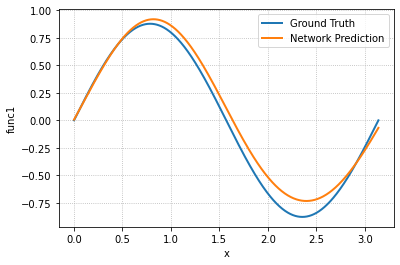

In [19]:
plt.grid(True, which="both", ls=":")
plt.plot(x_test, func1_test, label="Ground Truth",lw=2)
plt.plot(x_test, func1_test_pred.detach(), label="Network Prediction",lw=2)
plt.xlabel("x")
plt.ylabel("func1")
plt.legend()

In [20]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((func2_test_pred - func2_test)**2)/torch.mean(func2_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  0.07134995539672673 %


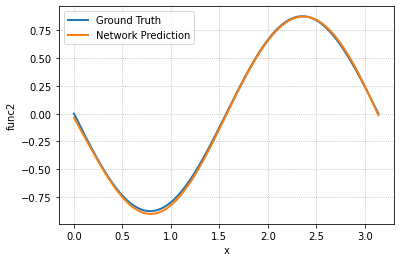

In [21]:
plt.grid(True, which="both", ls=":")
plt.plot(x_test, func2_test, label="Ground Truth",lw=2)
plt.plot(x_test, func2_test_pred.detach(), label="Network Prediction",lw=2)
plt.xlabel("x")
plt.ylabel("func2")
plt.legend()

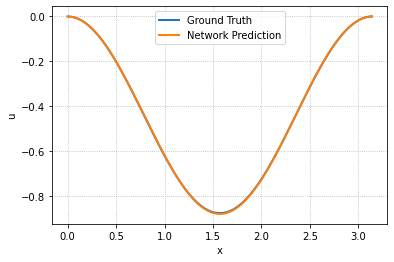

In [22]:
plt.grid(True, which="both", ls=":")
plt.plot(x_test, h_test, label="Ground Truth",lw=2)
plt.plot(x_test, h_test_pred.detach(), label="Network Prediction",lw=2)
plt.xlabel("x")
plt.ylabel("u")
plt.legend()

In [23]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((h_test_pred - h_test)**2)/torch.mean(h_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  0.0010676102647266816 %


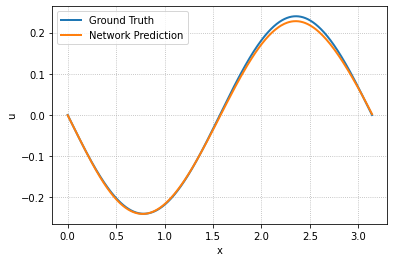

In [24]:
plt.grid(True, which="both", ls=":")
plt.plot(x_test, e1_test, label="Ground Truth",lw=2)
plt.plot(x_test, e1_test_pred.detach(), label="Network Prediction",lw=2)
plt.xlabel("x")
plt.ylabel("u")
plt.legend()

In [25]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((e1_test_pred - e1_test)**2)/torch.mean(e1_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  0.14713482232764363 %


In [26]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((e2_test_pred - e2_test)**2)/torch.mean(e2_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  0.19898619502782822 %


In [27]:
# for ploting

In [28]:
model = my_network
x_test = (pi/2)*torch.rand(100000).reshape(-1,1)
y_test = (pi/2)*torch.rand(100000).reshape(-1,1)
t_test = 0.5*torch.ones(100000).reshape(-1,1)

test = torch.cat([x_test, y_test, t_test],1)
h_test = exact_solution_h(x_test, y_test, t_test).reshape(-1,1)
e1_test = exact_solution_e1(x_test, y_test, t_test).reshape(-1,1)
e2_test = exact_solution_e2(x_test, y_test, t_test).reshape(-1,1)

w_test_pred = my_network(test)
h_pred = w_test_pred[:, 0].reshape(-1,1) 
e1_pred = w_test_pred[:, 1].reshape(-1,1)
e2_pred = w_test_pred[:, 2].reshape(-1,1)
func1_pred = w_test_pred[:, 3].reshape(-1,1)
func2_pred = w_test_pred[:, 4].reshape(-1,1)

func1_test = 2*torch.cos(x_test)*torch.cos(t_test)*torch.sin(y_test)
func1_test = func1_test.reshape(-1,1)

func2_test = -2*torch.sin(x_test)*torch.cos(t_test)*torch.cos(y_test)
func2_test = func2_test.reshape(-1,1)

relative_error_h = torch.abs(h_pred- h_test)
relative_error_e1 = torch.abs(e1_pred- e1_test)
relative_error_e2 = torch.abs(e2_pred- e2_test)
relative_error_func1 = torch.abs(func1_pred- func1_test)
relative_error_func2 = torch.abs(func2_pred- func2_test)

x_test = x_test.detach().numpy()
y_test = y_test.detach().numpy()
t_test = t_test.detach().numpy()
h_pred = h_pred.detach().numpy()
e1_pred = e1_pred.detach().numpy()
e2_pred = e2_pred.detach().numpy()
func1_pred = func1_pred.detach().numpy()
func2_pred = func2_pred.detach().numpy()
relative_error_h = relative_error_h.detach().numpy()
relative_error_e1 = relative_error_e1.detach().numpy()
relative_error_e2 = relative_error_e2.detach().numpy()
relative_error_func1 = relative_error_func1.detach().numpy()
relative_error_func2 = relative_error_func2.detach().numpy()
func1_test = func1_test.detach().numpy()
func2_test = func2_test.detach().numpy()

x_test = x_test.reshape(-1,)
t_test = t_test.reshape(-1,)
h_pred = h_pred.reshape(-1,)
e1_pred = e1_pred.reshape(-1,)
e2_pred = e2_pred.reshape(-1,)
func1_pred = func1_pred.reshape(-1,)
func2_pred = func2_pred.reshape(-1,)

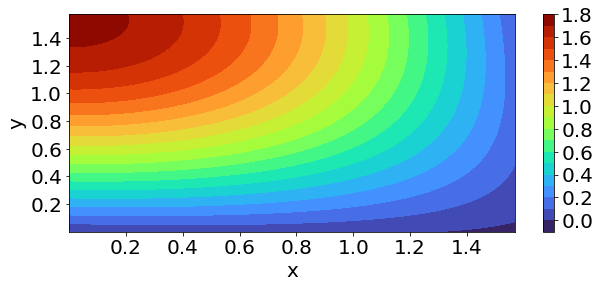

In [29]:
plt.rcParams['figure.figsize'] = [10, 4]

x_test = x_test.reshape(-1, )
y_test = y_test.reshape(-1, )

CS = plt.tricontourf(x_test, y_test, func1_pred, 20, cmap='turbo')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.savefig('Results/twod/exp4/f1_pred_2d_5.png', dpi = 300, bbox_inches = "tight")

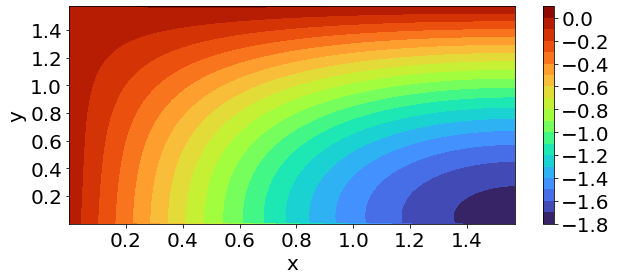

In [30]:
CS = plt.tricontourf(x_test, y_test, func2_pred, 20, cmap='turbo')

x_test = x_test.reshape(-1, )
y_test = y_test.reshape(-1, )

cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('Results/twod/exp4/f2_pred_2d_5.png', dpi = 300, bbox_inches = "tight")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

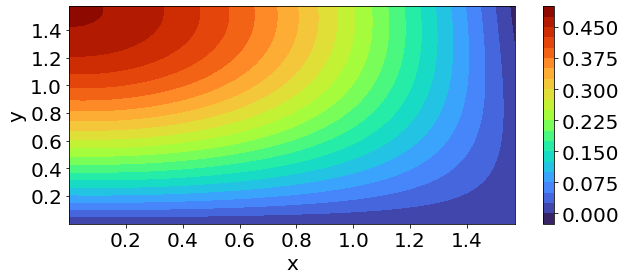

In [31]:
CS = plt.tricontourf(x_test, y_test, e2_pred, 20, cmap='turbo')

x_test = x_test.reshape(-1, )
y_test = y_test.reshape(-1, )

cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.savefig('Results/twod/exp4/e2_pred.png', dpi = 300, bbox_inches = "tight")

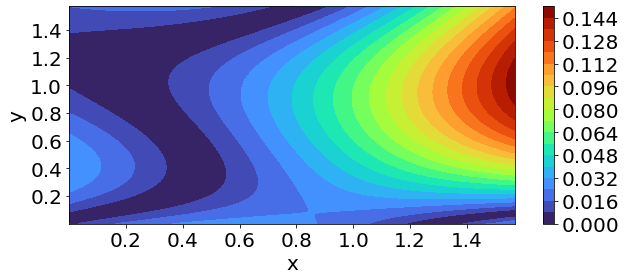

In [32]:
x_test = x_test.reshape(-1, )
y_test = y_test.reshape(-1, )
relative_error_func1 = relative_error_func1.reshape(-1,)

CS = plt.tricontourf(x_test, y_test, relative_error_func1, 20, cmap='turbo')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('Results/twod/exp4/f1_error_2d_5.png', dpi = 300, bbox_inches = "tight")

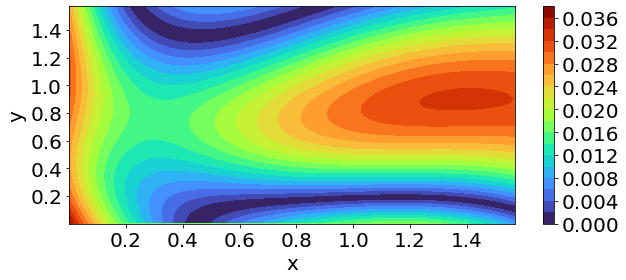

In [33]:
relative_error_func2 = relative_error_func2.reshape(-1,)

CS = plt.tricontourf(x_test, y_test, relative_error_func2, 20, cmap='turbo')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('Results/twod/exp4/f2_error_2d_5.png', dpi = 300, bbox_inches = "tight")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

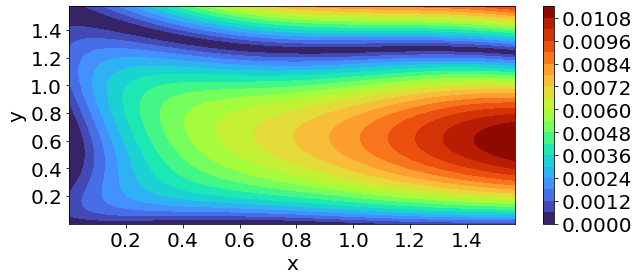

In [34]:
relative_error_e2 = relative_error_e2.reshape(-1,)

CS = plt.tricontourf(x_test, y_test, relative_error_e2, 20, cmap='turbo')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.savefig('Results/twod/exp5/e2_error.png', dpi = 300, bbox_inches = "tight")